<font size="+5" color='#053c96'><h2><center> Sentiment Analysis </h2></center></font>
<figure>
<center><img src ="https://th.bing.com/th/id/OIP.W_mmd2Xnx93yweD2UW3thgHaEm?pid=ImgDet&rs=1" width = "750" height = '600' alt="Financial Fraud Detection"/>

<a id='table-of-contents'></a>
[Table of Contents](#table-of-contents)

- [Introduction](#introduction)
  * [Problem Statement](#problem-statement)
  * [Objectives](#goals)
- [Importing Libraries](#importing-dependencies)
- [Functions](#functions)
- [Data](#data)
- [Exploratory Data Analysis](#exploratory-data-analysis)
  * [Data Preparation](#data-preparation)
  * [Data Cleaning](#data-cleaning)
  * [Data Exploration & Visualization](#data-exploration)
    * [Pre-release](#pre)
    * [Post-release](#post)
- [Sentiment Analysis using Vader](#modeling)
  * [Artists](#artists)
  * [Pre-release](#pre-selection)
  * [Post-release](#post-selection)
  * [All-Tweets](#all-selection)
- [Results](#results)
  * [Analysis Results](#analysis-results)
  * [Implications](#implications)
- [Conclusion](#conclusion)
  * [Summary](#summary)
  * [Limitations](#limitations)
  * [Recommendations](#recommendations)

<a id='introduction'></a>
<font size="+4" color='#053c96'><b> Introduction</b></font>  
[back to top](#table-of-contents)  

This project aims to develop a Python-based social media sentiment analysis that allows clients to analyze comments or users' interactions with social media accounts of musicians before and after they release their music. The project will collect data from various social media platforms, clean and preprocess the data, perform sentiment analysis, and display the collected data in a visually appealing and easy-to-read format. The project will provide insights on frequently used words, hashtags, users, and comment sentiment. The project will ensure that the analysis is performed on high-quality data, leading to more accurate results.

<a id='problem-statement'></a>
<font size="+3" color='#780404'><b> Problem Statement</b></font>  
[back to top](#table-of-contents)  

This project aims to address the need for a comprehensive social media sentiment analysis tool for the client. By collecting and analyzing data from various social media platforms, the tool will provide insights on frequently used words, hashtags, users, and comment sentiment before and after a music release.

<a id='goals'></a>
<font size="+3" color='#780404'><b> Objectives</b></font>  
[back to top](#table-of-contents)  

- Collect data from various social media platforms within a specific time frame before and after the music release date.
- Preprocess the collected data by removing unnecessary characters, handling missing data, removing stop words, and performing other transformations to prepare the data for sentiment analysis.
- Use NLTK's Vader to perform sentiment analysis on each comment and classify them as positive, negative or neutral.
- Provide insights on frequently used words, hashtags, users, and comment sentiment to help the client analyze social media posts of musicians.
- Develop a visually appealing and easy-to-read notebook that displays the collected data in the form of graphs, charts, and other visualizations to enable the client to quickly analyze the data and gain insights.

<a id='importing-dependencies'></a>
<font size="+4" color='#053c96'><b> Importing Libraries</b></font>  
[back to top](#table-of-contents)

In [178]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # plot style
from wordcloud import WordCloud
pd.options.display.float_format = '{:.0f}'.format

# Libraries for Natural Language Processing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import TreebankWordTokenizer
from nltk import SnowballStemmer, PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
#from nltk.util import ngrams
import re
import contractions # for word contractions
import string
import emoji

import warnings
warnings.filterwarnings('ignore')

<a id='functions'></a>
<font size="+4" color='#053c96'><b> Functions</b></font>  
[back to top](#table-of-contents)  

Here are the functions that have been defined for this project:

- drop_columns(df): This function drops unnecessary columns from a given DataFrame.
- drop_null_tweets(df): This function removes any rows with null values in the Tweet_Content column of a given DataFrame.
- add_artist(df, name): This function adds an Artist column to a given DataFrame and fills it with the specified name.
- combine_dataframes(dfs): This function combines a list of DataFrames into one DataFrame.
- clean_column(column): This function cleans text data by converting to lowercase, removing non-ASCII characters, removing URLs, removing punctuation, and removing numbers.
- text_preproc(x): This function standardizes text data by expanding contractions, removing extra spaces and newlines.
- emoji_converter(x): This function converts emojis to words, removes hashtags, user names, and stop words from text data.
- extract_hashtags(df, column): This function extracts hashtags from a given column of a DataFrame and returns a DataFrame containing the hashtags and their occurrences.
- extract_users(df, column): This function extracts user names from a given column of a DataFrame and returns a DataFrame containing the user names and their occurrences.
- plot_hashtags(df, name): This function plots the hashtags extracted from a DataFrame using extract_hashtags.
- get_sentiment_label(tweet): This function uses the VADER Sentiment Analyzer to determine the sentiment of a given tweet and returns a label of 'Positive', 'Negative', or 'Neutral'.

In [179]:
def drop_columns(df):
    """The drop_columns function takes a DataFrame as input and drops several columns deemed unnecessary for our analysis.
    The function returns the updated DataFrame with the specified columns removed."""
    
    df = df.drop(['Category', 'Keyword', 'Web_Page_URL', 'Tweet_Timestamp', 'Tweet_Image_URL', 'Author_Name',
       'Retweet_Original_Tweet_Content', 'Retweet_Original_Tweet_Poster',
       'Retweet_Original_Tweet_Time', 'Retweet_Original_Tweet_PosterID', 'Retweet_or_not'], axis=1)
    return df

In [180]:
def drop_null_tweets(df, column):
    """Drop rows with missing values in the 'Tweet_Content' column of the given DataFrame.

    Args:
    df (pandas.DataFrame): Input DataFrame.

    Returns:
    pandas.DataFrame: DataFrame with missing values in 'Tweet_Content' column removed.
    """
    df = df.dropna(subset=[column], axis=0)
    return df

In [181]:
def add_artist(df, name):
    """This function takes in a pandas DataFrame and an artist name as inputs.
    It then adds a new column named 'Artist' to the DataFrame with the provided artist name as its value for all rows.
    Finally, the updated DataFrame is returned."""
    df['Artist'] = name
    return df

In [182]:
def combine_dataframes(dfs):
    """The combine_dataframes function takes a list of dataframes as input and concatenates them into a single dataframe.

    Args:

    dfs: a list of pandas dataframes to be combined
    Returns:

    combined_df: a single pandas dataframe with all the rows from the input dataframes
    The function iterates through each dataframe in the input list,
    and uses the append() method to concatenate it to the previously combined dataframe.
    It also sets ignore_index=True to ensure that the row indexes are reset in the final dataframe.
    Finally, it returns the concatenated dataframe."""
    combined_df = pd.DataFrame()  # create an empty dataframe to start with
    for df in dfs:
        combined_df = combined_df.append(df, ignore_index=True)  # append the rows of the current dataframe to the previous one
    return combined_df


In [183]:
#function to remove noise from dataframe

def clean_column(column):
    """The function clean_column(column) removes noise from a given column of a DataFrame by
    converting the text to lowercase,
    removing web URLs, removing punctuation,
    removing numbers and converting unicode characters into binary strings.
    The cleaned column is returned."""
    #convert to lowercase()
    column = column.str.lower()
    #convert unicode characters into binary string
    column = column.str.encode('ascii', 'ignore').str.decode("utf-8")
    #removes web URL from text
    column = column.str.replace(r'https*\S+', 'url ', regex=True)
    #removes "\" from string
    column = column.str.replace(r'\'\w+', ' ', regex=True)
    
    column = column.str.replace(r'([A-Za-z])\1{2,}', r'\1', regex=True)
    # removes punctuation from string
    column = column.str.replace('[%s]' % re.escape(string.punctuation), ' ', regex=True)
    # removes numbers from string
    column = column.str.replace(r'\w*\d+\w*', ' ', regex=True)
    return column

In [184]:
def text_preproc(x):
    """The function text_preproc takes an input and performs the following text pre-processing steps:
    It expands contractions using the contractions package.
    It replaces multiple spaces with a single space using regular expressions.
    It replaces newline characters with a single space using regular expressions.
    """
    x = ' '.join([contractions.fix(word) for word in x.split()])
    x = re.sub(' +', ' ', x)
    x = re.sub('\n', ' ', x)
    return x

The ***text_preproc*** function changes all the contradictions (*e.g don't **to** do not **and** there's **to** there is*), and removes extra whitespaces

In [185]:
def emoji_converter(x):
    """The function emoji_converter takes in a string of text as input,
    converts emojis to words,
    removes hashtags and user names,
    and then removes stopwords.
    The function returns the preprocessed string.
    """
    # Convert emojis to words
    x = ' '.join([emoji.demojize(word) for word in x.split()])
    # Remove hashtags
    x = re.sub(r'#\w+', '', x)
    # Remove user names
    x = re.sub(r'@\w+', '', x)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    x = ' '.join([word for word in x.split() if word.lower() not in stop_words])
    return x

In [186]:
def plot_sentiment_distribution(df, column):
    sns.countplot(data=df, x=column)

In [187]:
def hashtags_column(df, column):
    """
    This function takes a DataFrame and a column name as input and extracts hashtags from the text in that column.
    It returns a DataFrame with a new column 'hashtags' containing all the hashtags found in the text.
    """
    df['hashtags'] = df[column].apply(lambda x: re.findall('(#\w+)', x.lower()))
    return df

In [188]:
def extract_username_from_twitter_url(url):
    """
    This function takes a Twitter profile URL as input and extracts the username from it.
    It returns the extracted username.
    """
    pattern = r"https?://twitter.com/(\w+)"
    match = re.search(pattern, url)
    if match:
        return match.group(1)
    else:
        return None

def extract_username(df, column):
    """
    This function takes a DataFrame and a column name as input.
    It extracts Twitter usernames from the URLs in the specified column and adds a new column 'users' to the DataFrame.
    """
    df['users'] = df[column].apply(lambda x: extract_username_from_twitter_url(x))
    return df


In [189]:
def extract_hashtags(df, column):
    """
    This function takes a DataFrame and a column name as input and extracts hashtags from the text in that column.
    It returns a DataFrame with two columns - 'hashtag' and 'occurrences'.
    The 'hashtag' column contains the hashtag text and
    the 'occurrences' column contains the number of times that hashtag appears in the text.
    """
    hashtags = df[column].apply(lambda x: pd.value_counts(re.findall('(#\w+)', x.lower() )))\
                     .sum(axis=0)\
                     .to_frame()\
                     .reset_index()\
                     .sort_values(by=0,ascending=False)
    hashtags.columns = ['hashtag','occurences']
    return hashtags

In [190]:
def extract_users(df, column):
    """
    The function extract_users takes a dataframe and a column name as input,
    and returns a dataframe with two columns - the username
    and the number of times it occurs in the specified column of the input dataframe.
    It uses regular expressions to find all mentions of usernames (starting with '@')
    and then counts the number of occurrences for each unique username.
    The resulting dataframe is sorted in descending order of occurrence count.
    """
    users= df[column].apply(lambda x: pd.value_counts(re.findall('(@[A-Za-z0-9]+)', x.lower() )))\
                     .sum(axis=0)\
                     .to_frame()\
                     .reset_index()\
                     .sort_values(by=0,ascending=False)
    users.columns = ['user','occurences']
    return users

In [191]:
def plot_hashtags(df, name):
    df.plot(fontsize=10,figsize  = (10,5), kind='bar',y='occurences',x='hashtag')
    plt.xticks(rotation = 75)
    plt.tight_layout()
    plt.grid(False)
    plt.suptitle(f'Hashtags for {name} Tweets', fontsize=14);

In [192]:
def plot_users(df, name):
    df[:50].plot(fontsize=10,figsize  = (10,5), kind='bar',y='occurences',x='user')
    plt.xticks(rotation = 75, fontsize=14)
    plt.tight_layout()
    plt.grid(False)
    plt.suptitle(f'Top Users mention in {name} Tweets', fontsize=14);

In [193]:
def plot_wordcloud(df, name):
    all_tweets = " ".join(word for word in df.Tweet_Content)
    fig, ax = plt.subplots(1, 1, figsize  = (10,10))
    # Create and generate a word cloud image:
    wordcloud_all = WordCloud(max_font_size=100, max_words=100, background_color="black").generate(all_tweets)
    # Display the generated image:
    ax.imshow(wordcloud_all, interpolation='bilinear')
    ax.set_title(f'WordCloud for {name} Tweets', fontsize=14)
    ax.axis('off');

In [194]:
def get_sentiment_label(tweet):
    """
    This function takes in a tweet as input,
    performs sentiment analysis on it using the VADER
    (Valence Aware Dictionary and Sentiment Reasoner) sentiment analysis tool,
    and returns a sentiment label for the tweet (Positive, Negative or Neutral)
    based on the compound score calculated by VADER.
    """
    sid = SentimentIntensityAnalyzer()
    scores = sid.polarity_scores(tweet)
    if scores['compound'] >= 0.05:
        return 'Positive'
    elif scores['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

<a id='data'></a>
<font size="+4" color='#053c96'><b> Data</b></font>  
[back to top](#table-of-contents)

Data was scraped from Twitter and YouTube using Octoparse software

In [195]:
davido_announcement = pd.read_csv('Data/Davido-Timeless-Announcement.csv')
davido_release = pd.read_csv('Data/Davido-Timeless-release-tweet-data.csv')

1. davido_announcement contains comments and replies from Davido's tweet:   
   *****It’s almost time! I bring to you the official tracklist for my upcoming album #TIMELESS, with Spotify. Get ready⏳ @Spotify @SpotifyAfrica @SpotifyUK*****   
   which announced his album timeless  
[tweet_link]('https://twitter.com/davido/status/1641138979545153540')

2. davido_release contains comments and replies from Davido's tweet:  
   *****At long last - WE are back. The journey from my last album to this album has been a whirlwind to say the least. I recall sitting & staring over the ocean not too long ago, wondering if I could get here again, after all I’ve been through… but with your love & support, we made it.*****  
   which is the release of his album timeless  
[tweet_link]('https://twitter.com/davido/status/1641577352453844992')

In [196]:
dualipa_announcement = pd.read_csv('Data/dua lipa - future nostalgia - announcement.csv')
dualipa_release = pd.read_csv('Data/dua lipa - future nostalgia - release.csv')

1. dualipa_announcement contains comments and replies from Dualipa's tweet:   
   *****FUTURE NOSTALGIA - THE ALBUM - COMING TO YOU APRIL 3RD - SHOT BY HUGO COMTE - 🌕🔐💛*****   
   which announced her album Future Nostalgia  
[tweet_link]('https://twitter.com/DUALIPA/status/1222673981452369921')

2. dualipa_release contains comments and replies from Dualipa's tweet:   
   *****I’ve decided to bring forward the release of my album Future Nostalgia by ONE WEEK! It will now be out THIS FRIDAY, MARCH 27th! I hope this brings you some happiness, and I hope it makes you smile, and I hope it makes you dance. I hope I make you proud. https://t.co/4n2EIZS1w2*****   
   which is the release of her album Future Nostalgia  
[tweet_link]('https://twitter.com/DUALIPA/status/1242093839772454913')

In [197]:
halsey_announcement = pd.read_csv('Data/halsey - manic - release.csv')
halsey_release = pd.read_csv('Data/halsey - manic - announcement.csv')

1. halsey_announcement contains comments and replies from Halsey's tweet:   
   *****Manic, the full emotional spectrum available 1.17 https://t.co/S2li1qO9vV*****   
   which announced her album Manic  
[tweet_link]('https://twitter.com/halsey/status/1217672047335104512')

2. halsey_release contains comments and replies from Halsey's tweet:   
   *****The most torturing and beautiful wait of my life has come to an end. MANIC is out now. #manicthealbum http://halsey.lnk.to/ManicTheAlbum*****   
   which is the release of her album Manic  
[tweet_link]('https://twitter.com/halsey/status/1218035958588698624')

In [198]:
killers_announcement = pd.read_csv('Data/the killers imploding the mirage announcement.csv')
killers_release = pd.read_csv('Data/the killers imploding the mirage release.csv')

1. killers_announcement contains comments and replies from The Killer's tweet:   
   *****COVID-19 monkey wrenched us. But we persevered. Folks, mark your calendars. “Imploding The Mirage” is out August 21st. Pre-order the album here: http://thekillers.lnk.to/Store*****   
   which announced their album Imploding The Mirage  
[tweet_link]('https://twitter.com/thekillers/status/1283822465739657216')

2. killers_release contains comments and replies from The Killer's tweet:   
   *****Imploding the Mirage is out now. Listen here: http://thekillers.lnk.to/Imploding-The-Mirage*****   
   which is the release of their album Imploding The Mirage  
[tweet_link]('https://twitter.com/thekillers/status/1296825571561705474')

In [199]:
weeknd_announcement = pd.read_csv('Data/the weeknd after hours announcement.csv')
weeknd_release = pd.read_csv('Data/the weeknd after hours release.csv')

1. weeknd_announcement contains comments and replies from The Weeknd's tweet:   
   *****Album Title*****   
   which announced the album After Hours  
[tweet_link]('https://twitter.com/theweeknd/status/1228026240029741058')

2. weeknd_release contains comments and replies from The Weeknd's tweet:   
   *****ITS OUT #AFTERHOURS*****   
   which is the release of the album After Hours  
[tweet_link]('https://twitter.com/theweeknd/status/1240851625167556610')

The above code reads in several CSV files containing data related to music album announcements and releases. The data includes information such as the artist, the content of the tweet, the date and time of the tweet, and other relevant details. This data will be used for analysis and visualization in the project.

<a id='data'></a>
<font size="+4" color='#053c96'><b> Exploratory Data Analysis</b></font>  
[back to top](#table-of-contents)

In [200]:
davido_announcement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Category                         183 non-null    object 
 1   Keyword                          0 non-null      float64
 2   Web_Page_URL                     183 non-null    object 
 3   Tweet_Website                    182 non-null    object 
 4   Author_Name                      34 non-null     object 
 5   Author_Web_Page_URL              182 non-null    object 
 6   Tweet_Timestamp                  182 non-null    float64
 7   Tweet_Time                       183 non-null    object 
 8   Tweet_Content                    152 non-null    object 
 9   Tweet_Image_URL                  19 non-null     object 
 10  Tweet_Number_of_Likes            168 non-null    float64
 11  Tweet_Number_of_Retweets         36 non-null     float64
 12  Tweet_Number_of_Review

In [201]:
davido_announcement.head()

Category  Keyword                                       Web_Page_URL  \
0     Post      NaN  https://twitter.com/davido/status/164113897954...   
1     Post      NaN  https://twitter.com/davido/status/164113897954...   
2     Post      NaN  https://twitter.com/davido/status/164113897954...   
3     Post      NaN  https://twitter.com/davido/status/164113897954...   
4     Post      NaN  https://twitter.com/davido/status/164113897954...   

                                       Tweet_Website       Author_Name  \
0  https://twitter.com/davido/status/164113897954...           @davido   
1  https://twitter.com/ImoPunter/status/164113906...        @ImoPunter   
2  https://twitter.com/REAL_OKIEMUTINI/status/164...  @REAL_OKIEMUTINI   
3  https://twitter.com/Devil30BG/status/164113910...               NaN   
4  https://twitter.com/Danny53876/status/16411395...       @Danny53876   

                   Author_Web_Page_URL  Tweet_Timestamp          Tweet_Time  \
0           https://twitter.com/davido    1680112998000  2023-03-29 18:3:18   
1        https://twitter.com/ImoPunter    1680113019000  2023-03-29 18:3:39   
2  https://twitter.com/REAL_OKIEMUTINI    1680113022000  2023-03-29 18:3:42   
3        https://twitter.com/Devil30BG    1680113027000  2023-03-29 18:3:47   
4       https://twitter.com/Danny53876    1680113129000  2023-03-29 18:5:29   

                                       Tweet_Content Tweet_Image_URL  \
0  It’s almost time! \r\n\r\nI bring to you the o...             NaN   
1                               The Only one DAVIDO              NaN   
2                                    Yes!!!!! 001                NaN   
3              No one cares \r\nYou fell off lil bro             NaN   
4          Comot that YB pic for your dP you day mad             NaN   

   Tweet_Number_of_Likes  Tweet_Number_of_Retweets  Tweet_Number_of_Reviews  \
0                    NaN                       NaN                      NaN   
1                     42                         2                        3   
2                     23                       NaN                        2   
3                      7                         1                       13   
4                    NaN                       NaN                        1   

  Retweet_or_not Retweet_Original_Tweet_Content Retweet_Original_Tweet_Poster  \
0             No                            NaN                           NaN   
1             No                            NaN                           NaN   
2             No                            NaN                           NaN   
3             No                            NaN                           NaN   
4             No                            NaN                           NaN   

  Retweet_Original_Tweet_Time Retweet_Original_Tweet_PosterID  
0                         NaN                             NaN  
1                         NaN                             NaN  
2                         NaN                             NaN  
3                         NaN                             NaN  
4                         NaN                             NaN

In [202]:
davido_announcement.describe(include='O')

Category                                       Web_Page_URL  \
count       183                                                183   
unique        1                                                  1   
top        Post  https://twitter.com/davido/status/164113897954...   
freq        183                                                183   

                                            Tweet_Website  Author_Name  \
count                                                 182           34   
unique                                                182           29   
top     https://twitter.com/davido/status/164113897954...  @SaveVidBot   
freq                                                    1            4   

                   Author_Web_Page_URL          Tweet_Time Tweet_Content  \
count                              182                 183           152   
unique                             172                 139           119   
top     https://twitter.com/SaveVidBot  2023-03-29 18:3:47           001   
freq                                 4                   6            11   

                                          Tweet_Image_URL Retweet_or_not  \
count                                                  19            183   
unique                                                 18              2   
top     https://pbs.twimg.com/card_img/164833135272543...             No   
freq                                                    2            181   

       Retweet_Original_Tweet_Content Retweet_Original_Tweet_Poster  \
count                               2                             2   
unique                              2                             2   
top                         Need You                     Zaddy Yung   
freq                                1                             1   

       Retweet_Original_Tweet_Time Retweet_Original_Tweet_PosterID  
count                            2                               2  
unique                           2                               2  
top                   Aug 18, 2022                    @SayYungstar  
freq                             1                               1

<a id='cleaning'></a>
<font size="+3" color='#780404'><b> Data Cleaning</b></font>  
[back to top](#table-of-contents)  

In [203]:
davido_announcement = drop_columns(davido_announcement)
davido_release = drop_columns(davido_release)
dualipa_announcement = drop_columns(dualipa_announcement)
dualipa_release = drop_columns(dualipa_release)
halsey_announcement = drop_columns(halsey_announcement)
halsey_release = drop_columns(halsey_release)
killers_announcement = drop_columns(killers_announcement)
killers_release = drop_columns(killers_release)
weeknd_announcement = drop_columns(weeknd_announcement)
weeknd_release = drop_columns(weeknd_release)

The code above drops some unnecessary columns from each of the dataframes

In [204]:
davido_announcement = drop_null_tweets(davido_announcement, 'Tweet_Content')
davido_release = drop_null_tweets(davido_release, 'Tweet_Content')
dualipa_announcement = drop_null_tweets(dualipa_announcement, 'Tweet_Content')
dualipa_release = drop_null_tweets(dualipa_release, 'Tweet_Content')
halsey_announcement = drop_null_tweets(halsey_announcement, 'Tweet_Content')
halsey_release = drop_null_tweets(halsey_release, 'Tweet_Content')
killers_announcement = drop_null_tweets(killers_announcement, 'Tweet_Content')
killers_release = drop_null_tweets(killers_release, 'Tweet_Content')
weeknd_announcement = drop_null_tweets(weeknd_announcement, 'Tweet_Content')
weeknd_release = drop_null_tweets(weeknd_release, 'Tweet_Content')
weeknd_release = weeknd_release.dropna(subset=['Author_Web_Page_URL'], axis=0)

The code above drops all the rows that have empty tweets from each of the dataframes

In [205]:
davido_announcement = add_artist(davido_announcement, 'Davido')
davido_release = add_artist(davido_release, 'Davido')
dualipa_announcement = add_artist(dualipa_announcement, 'Dua Lipa')
dualipa_release = add_artist(dualipa_release, 'Dua Lipa')
halsey_announcement = add_artist(halsey_announcement, 'Halsey')
halsey_release = add_artist(halsey_release, 'Halsey')
killers_announcement = add_artist(killers_announcement, 'The Killers')
killers_release = add_artist(killers_release, 'The Killers')
weeknd_announcement = add_artist(weeknd_announcement, 'The Weeknd')
weeknd_release = add_artist(weeknd_release, 'The Weeknd')

The code above adds artist name to all the rows from each of the dataframes related to the artist

In [206]:
davido_announcement = hashtags_column(davido_announcement, 'Tweet_Content')
davido_release = hashtags_column(davido_release, 'Tweet_Content')
dualipa_announcement = hashtags_column(dualipa_announcement, 'Tweet_Content')
dualipa_release = hashtags_column(dualipa_release, 'Tweet_Content')
halsey_announcement = hashtags_column(halsey_announcement, 'Tweet_Content')
halsey_release = hashtags_column(halsey_release, 'Tweet_Content')
killers_announcement = hashtags_column(killers_announcement, 'Tweet_Content')
killers_release = hashtags_column(killers_release, 'Tweet_Content')
weeknd_announcement = hashtags_column(weeknd_announcement, 'Tweet_Content')
weeknd_release = hashtags_column(weeknd_release, 'Tweet_Content')

In [207]:
davido_announcement = extract_username(davido_announcement, 'Author_Web_Page_URL')
davido_release = extract_username(davido_release, 'Author_Web_Page_URL')
dualipa_announcement = extract_username(dualipa_announcement, 'Author_Web_Page_URL')
dualipa_release = extract_username(dualipa_release, 'Author_Web_Page_URL')
#halsey_announcement = extract_username(halsey_announcement, 'Author_Web_Page_URL')
halsey_release = extract_username(halsey_release, 'Author_Web_Page_URL')
killers_announcement = extract_username(killers_announcement, 'Author_Web_Page_URL')
killers_release = extract_username(killers_release, 'Author_Web_Page_URL')
weeknd_announcement = extract_username(weeknd_announcement, 'Author_Web_Page_URL')
weeknd_release = extract_username(weeknd_release, 'Author_Web_Page_URL')

In [208]:
weeknd_release.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 0 to 171
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tweet_Website             146 non-null    object 
 1   Author_Web_Page_URL       146 non-null    object 
 2   Tweet_Time                146 non-null    object 
 3   Tweet_Content             146 non-null    object 
 4   Tweet_Number_of_Likes     71 non-null     float64
 5   Tweet_Number_of_Retweets  9 non-null      float64
 6   Tweet_Number_of_Reviews   20 non-null     float64
 7   Artist                    146 non-null    object 
 8   hashtags                  146 non-null    object 
 9   users                     146 non-null    object 
dtypes: float64(3), object(7)
memory usage: 12.5+ KB


In [209]:
davido_announcement.head()

Tweet_Website  \
0  https://twitter.com/davido/status/164113897954...   
1  https://twitter.com/ImoPunter/status/164113906...   
2  https://twitter.com/REAL_OKIEMUTINI/status/164...   
3  https://twitter.com/Devil30BG/status/164113910...   
4  https://twitter.com/Danny53876/status/16411395...   

                   Author_Web_Page_URL          Tweet_Time  \
0           https://twitter.com/davido  2023-03-29 18:3:18   
1        https://twitter.com/ImoPunter  2023-03-29 18:3:39   
2  https://twitter.com/REAL_OKIEMUTINI  2023-03-29 18:3:42   
3        https://twitter.com/Devil30BG  2023-03-29 18:3:47   
4       https://twitter.com/Danny53876  2023-03-29 18:5:29   

                                       Tweet_Content  Tweet_Number_of_Likes  \
0  It’s almost time! \r\n\r\nI bring to you the o...                    NaN   
1                               The Only one DAVIDO                      42   
2                                    Yes!!!!! 001                        23   
3              No one cares \r\nYou fell off lil bro                      7   
4          Comot that YB pic for your dP you day mad                    NaN   

   Tweet_Number_of_Retweets  Tweet_Number_of_Reviews  Artist     hashtags  \
0                       NaN                      NaN  Davido  [#timeless]   
1                         2                        3  Davido           []   
2                       NaN                        2  Davido           []   
3                         1                       13  Davido           []   
4                       NaN                        1  Davido           []   

             users  
0           davido  
1        ImoPunter  
2  REAL_OKIEMUTINI  
3        Devil30BG  
4       Danny53876

<a id='prep'></a>
<font size="+3" color='#780404'><b> Data Preparation</b></font>  
[back to top](#table-of-contents)  

In [210]:
davido_df = combine_dataframes([davido_announcement, davido_release])

In [211]:
dualipa_df = combine_dataframes([dualipa_announcement, dualipa_release])

In [212]:
halsey_df = combine_dataframes([halsey_announcement, halsey_release])

In [213]:
killers_df = combine_dataframes([killers_announcement, killers_release])

In [214]:
weeknd_df = combine_dataframes([weeknd_announcement, weeknd_release])

In [215]:
announcement_df = combine_dataframes([davido_announcement, dualipa_announcement,
                                      halsey_announcement, killers_announcement,
                                      weeknd_announcement])

In [216]:
announcement_df['Type'] = 'pre-release'

In [217]:
release_df = combine_dataframes([davido_release, dualipa_release,
                                      halsey_release, killers_release,
                                      weeknd_release])

In [218]:
release_df['Type'] = 'post-release'

In [219]:
all_df = combine_dataframes([announcement_df, release_df])

<a id='prep'></a>
<font size="+3" color='#780404'><b> Data Exploration & Visualization</b></font>  
[back to top](#table-of-contents)  

<a id='prep'></a>
<font size="+2" color='purple'><b> Pre-release</b></font>  
[back to top](#table-of-contents)  

<font size="+2" color='turquoise'><b> Davido</b></font>  

### We are going to look into the Davido announcement tweet, the hashtags, users mention and frequent words using Wordcloud

In [220]:
davido_announcement_hashtags = extract_hashtags(davido_announcement, 'Tweet_Content')
davido_announcement_users = extract_users(davido_announcement, 'Tweet_Content')

This code block extracted hashtags and users from the pre-release tweet of the artist

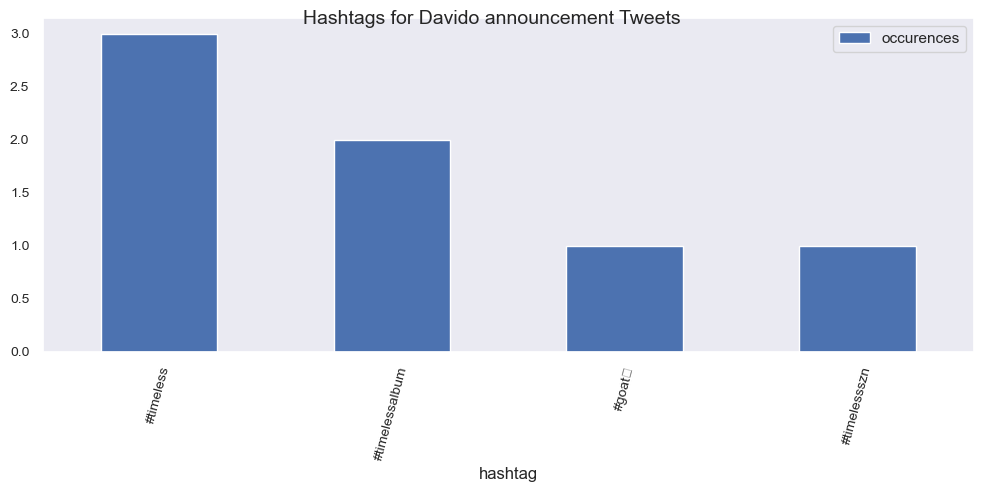

In [221]:
plot_hashtags(davido_announcement_hashtags, "Davido announcement")

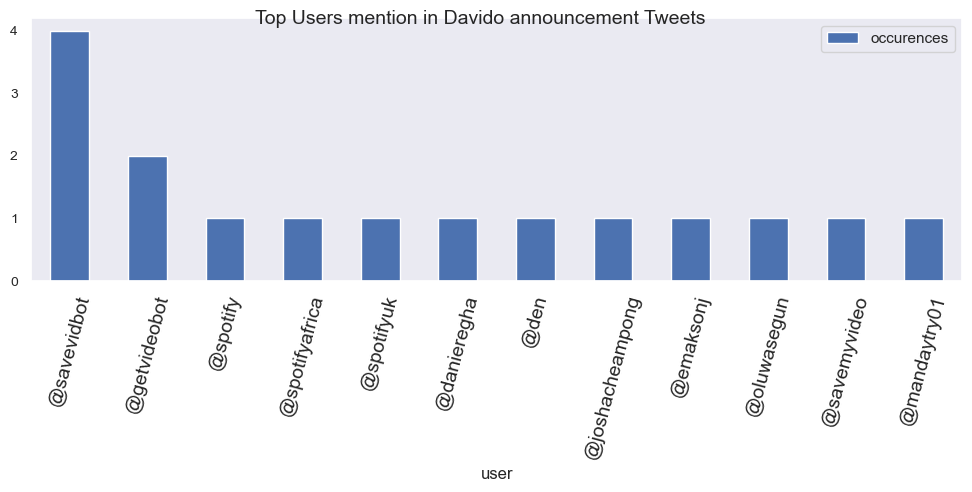

In [222]:
plot_users(davido_announcement_users, "Davido announcement")

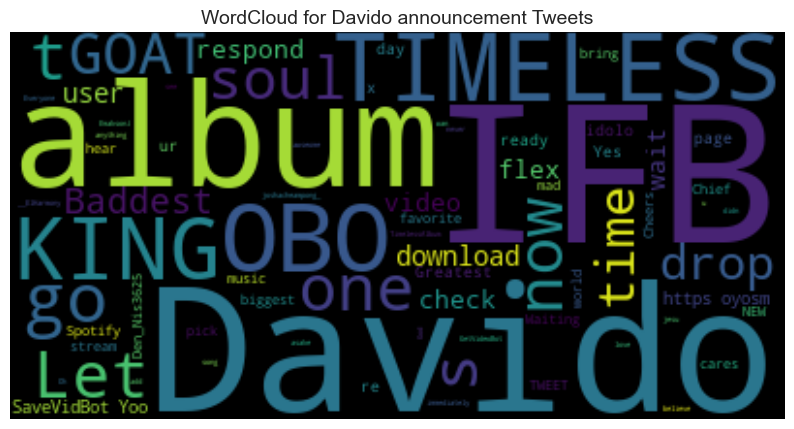

In [223]:
plot_wordcloud(davido_announcement, "Davido announcement")

<font size="+2" color='turquoise'><b> Dua Lipa</b></font>  

### We are going to look into the Dualipa announcement tweet, the hashtags, users mention and frequent words using Wordcloud

In [224]:
dualipa_announcement_hashtags = extract_hashtags(dualipa_announcement, 'Tweet_Content')
dualipa_announcement_users = extract_users(dualipa_announcement, 'Tweet_Content')

This code block extracted hashtags and users from the pre-release tweet of the artist

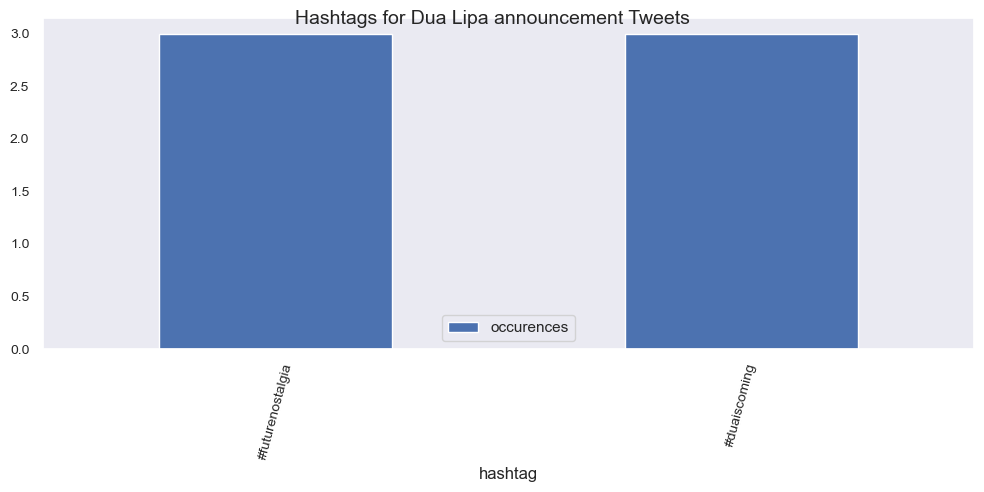

In [225]:
plot_hashtags(dualipa_announcement_hashtags, "Dua Lipa announcement")

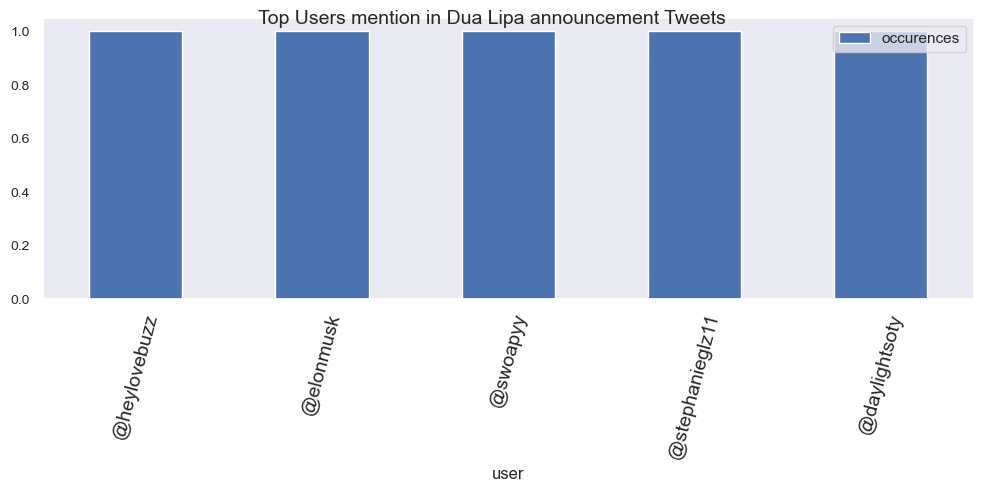

In [226]:
plot_users(dualipa_announcement_users, "Dua Lipa announcement")

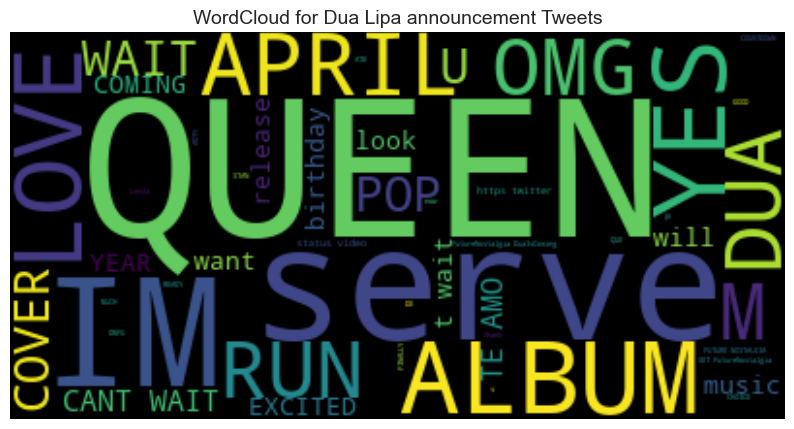

In [227]:
plot_wordcloud(dualipa_announcement, "Dua Lipa announcement")

<font size="+2" color='turquoise'><b> Halsey</b></font>   

### We are going to look into the Halsey announcement tweet, the hashtags, users mention and frequent words using Wordcloud 

In [228]:
halsey_announcement_hashtags = extract_hashtags(halsey_announcement, 'Tweet_Content')
halsey_announcement_users = extract_users(halsey_announcement, 'Tweet_Content')

This code block extracted hashtags and users from the pre-release tweet of the artist

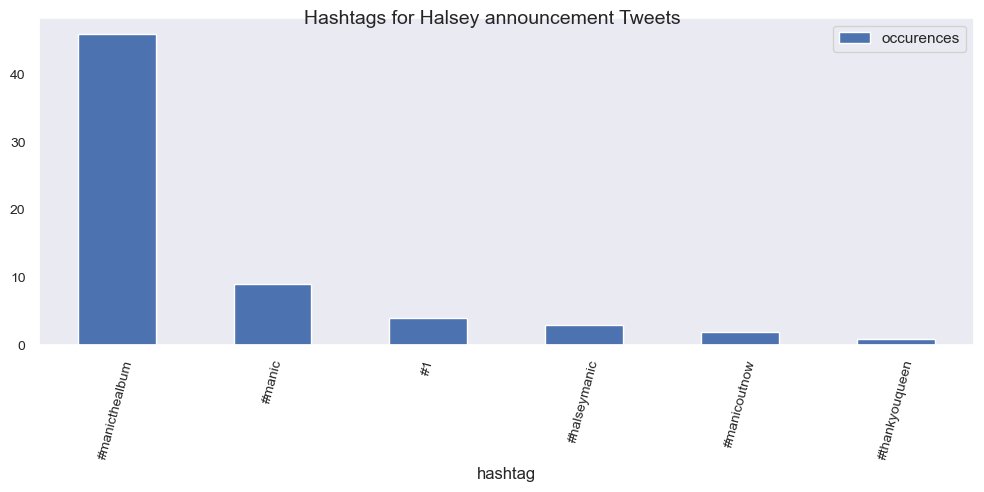

In [229]:
plot_hashtags(halsey_announcement_hashtags, 'Halsey announcement')

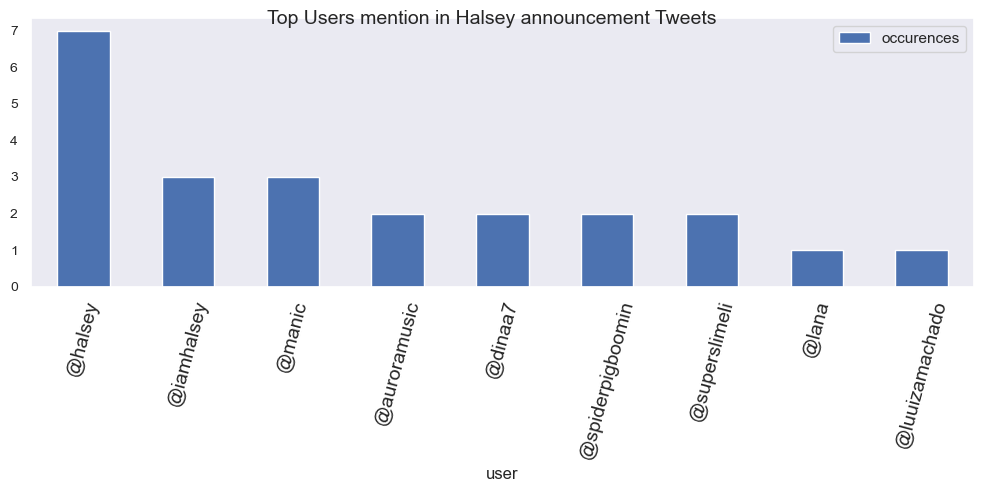

In [230]:
plot_users(halsey_announcement_users, 'Halsey announcement')

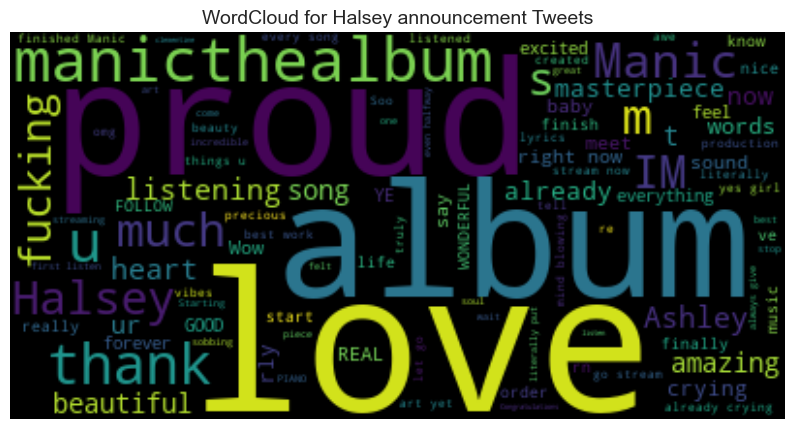

In [231]:
plot_wordcloud(halsey_announcement, 'Halsey announcement')

<font size="+2" color='turquoise'><b> The Killers</b></font>    

### We are going to look into the The Killers announcement tweet, the hashtags, users mention and frequent words using Wordcloud

In [232]:
killers_announcement_hashtags = extract_hashtags(killers_announcement, 'Tweet_Content')
killers_announcement_users = extract_users(killers_announcement, 'Tweet_Content')

This code block extracted hashtags and users from the pre-release tweet of the artist

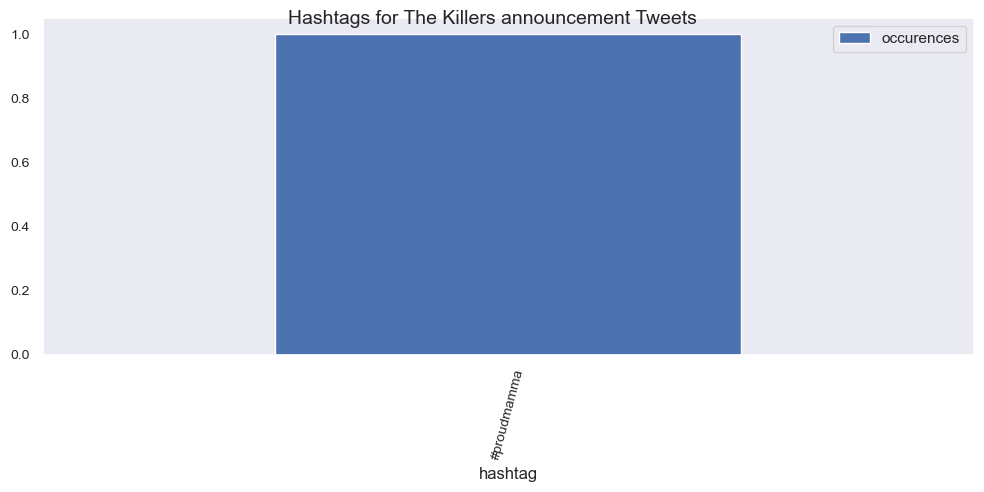

In [233]:
plot_hashtags(killers_announcement_hashtags, 'The Killers announcement')

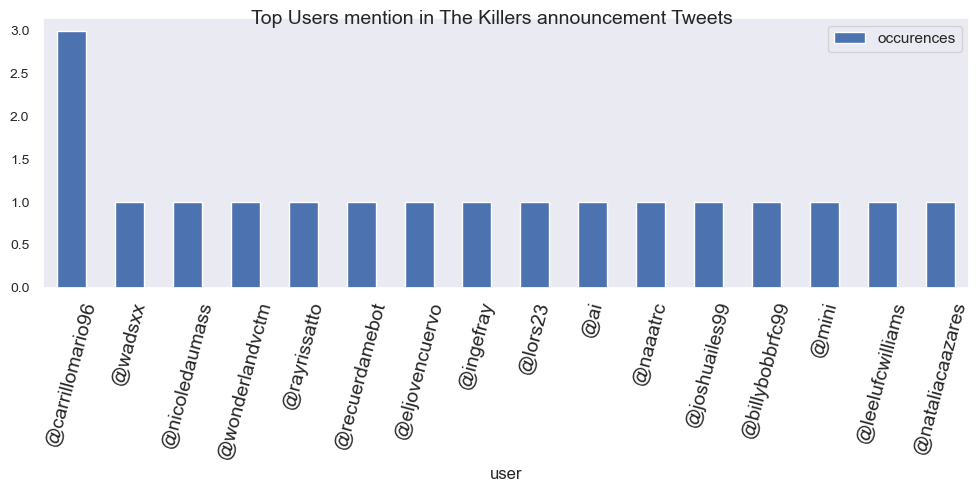

In [234]:
plot_users(killers_announcement_users, 'The Killers announcement')

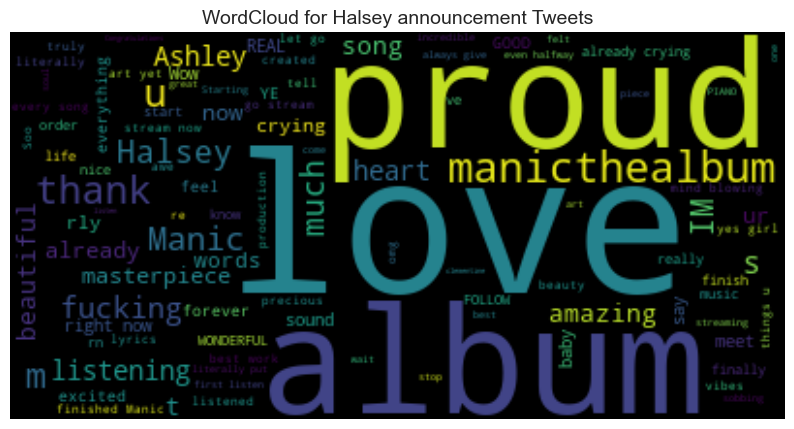

In [235]:
plot_wordcloud(halsey_announcement, 'Halsey announcement')

<font size="+1" color='turquoise'><b> The Weeknd</b></font>     

### We are going to look into the The Weeknd announcement tweet, the hashtags, users mention and frequent words using Wordcloud 

In [236]:
weeknd_announcement_hashtags = extract_hashtags(weeknd_announcement, 'Tweet_Content')
weeknd_announcement_users = extract_users(weeknd_announcement, 'Tweet_Content')

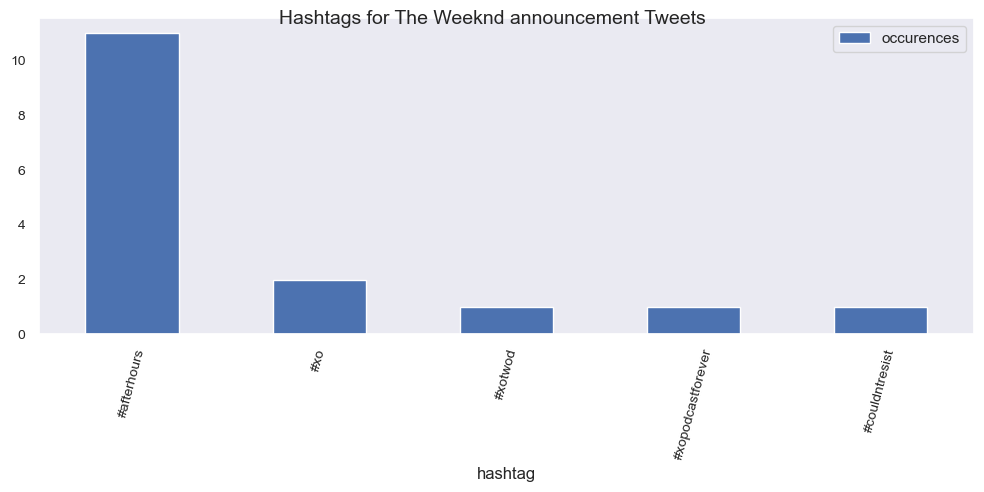

In [237]:
plot_hashtags(weeknd_announcement_hashtags, 'The Weeknd announcement')

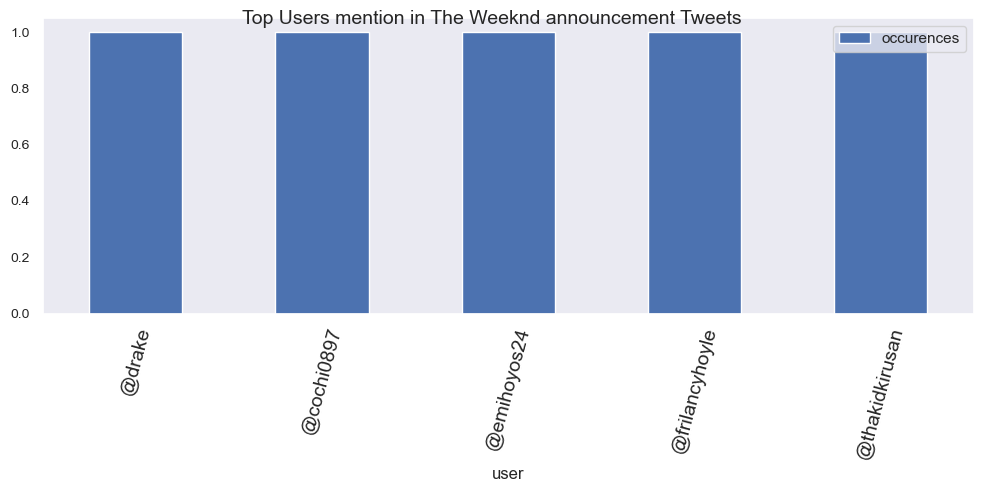

In [238]:
plot_users(weeknd_announcement_users, 'The Weeknd announcement')

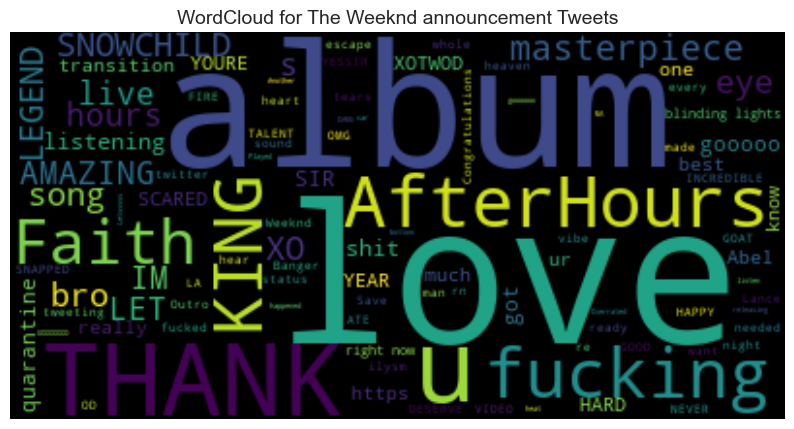

In [239]:
plot_wordcloud(weeknd_announcement, 'The Weeknd announcement')

<font size="+1" color='turquoise'><b> All Pre-release tweets</b></font>      

### We are going to look into the all artists announcement tweets combined, the hashtags, users mention and frequent words using Wordcloud

In [240]:
announcement_df_hashtags = extract_hashtags(announcement_df, 'Tweet_Content')
announcement_df_users = extract_users(announcement_df, 'Tweet_Content')

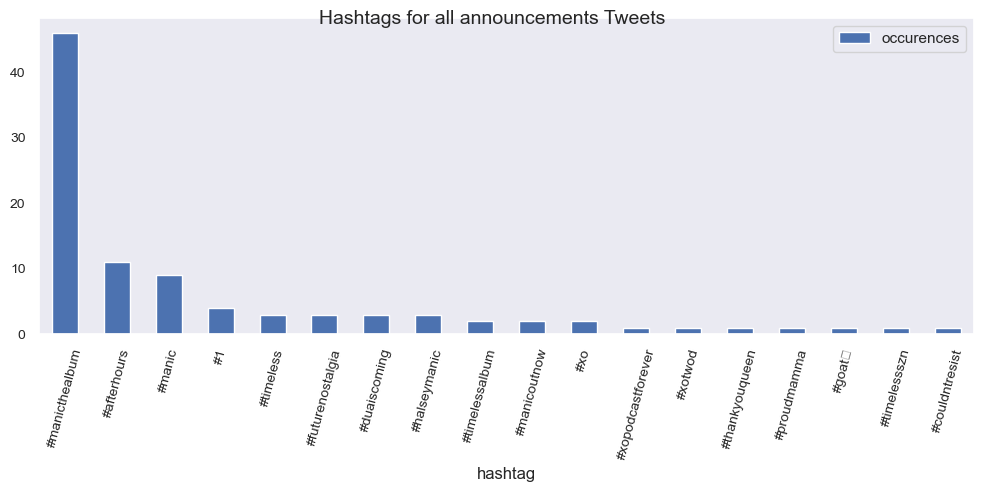

In [241]:
plot_hashtags(announcement_df_hashtags, 'all announcements')

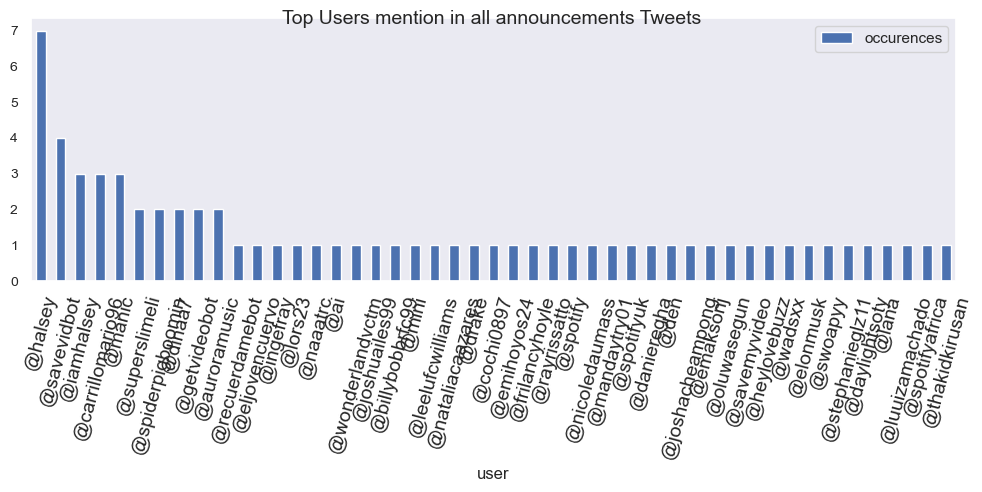

In [242]:
plot_users(announcement_df_users, 'all announcements')

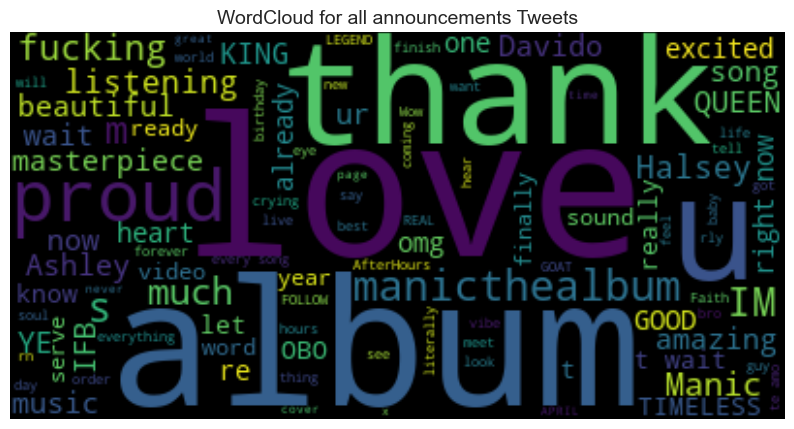

In [243]:
plot_wordcloud(announcement_df, 'all announcements')

<a id='prep'></a>
<font size="+2" color='purple'><b> Post-release</b></font>  
[back to top](#table-of-contents)  

<font size="+1" color='turquoise'><b> Davido</b></font>      

### We are going to look into the Davido's post-release tweet, the hashtags, users mention and frequent words using Wordcloud

In [244]:
davido_release_hashtags = extract_hashtags(davido_release, 'Tweet_Content')

In [245]:
davido_release_users = extract_users(davido_release, 'Tweet_Content')

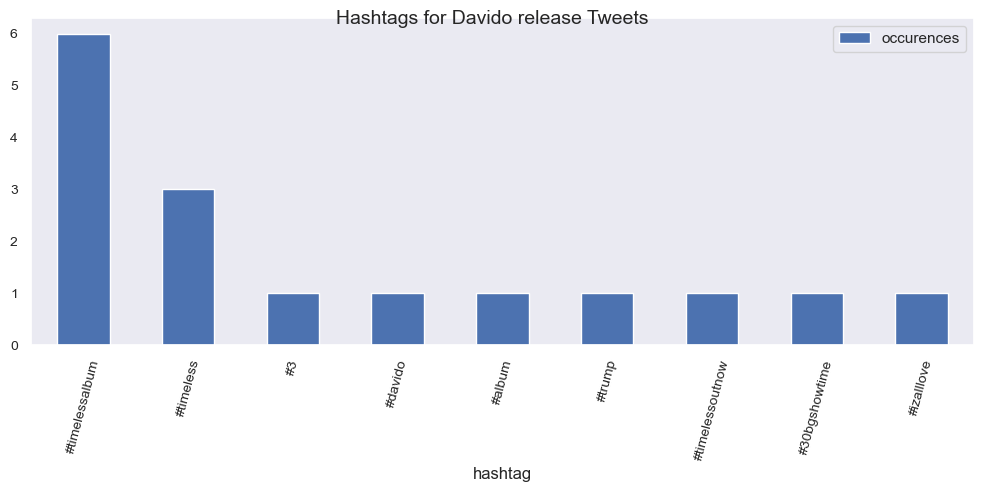

In [246]:
plot_hashtags(davido_release_hashtags, "Davido release")

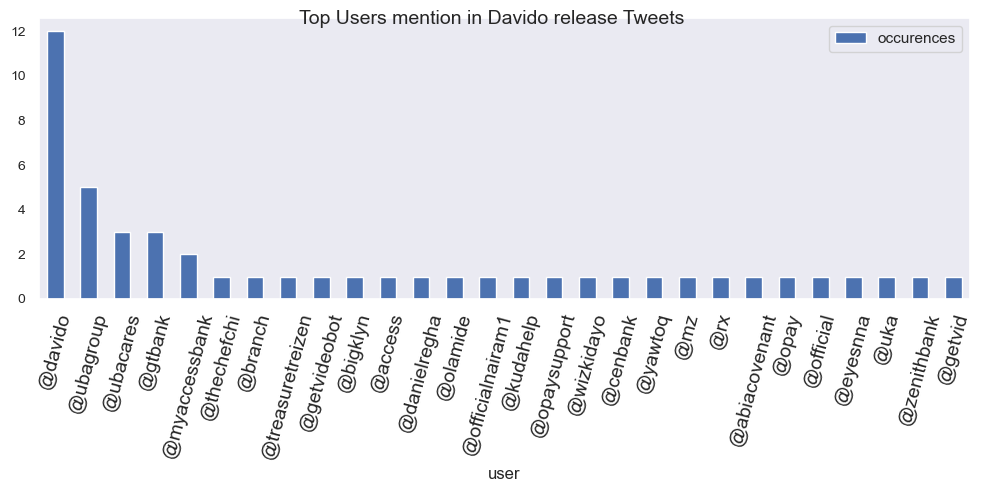

In [247]:
plot_users(davido_release_users, "Davido release")

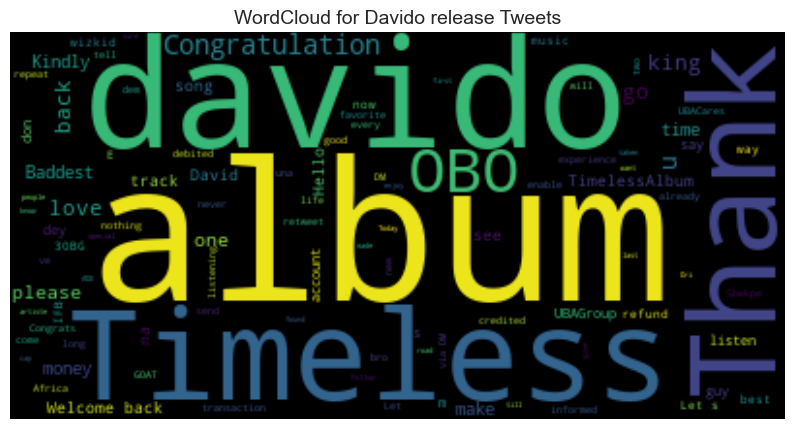

In [248]:
plot_wordcloud(davido_release, "Davido release")

<font size="+1" color='turquoise'><b> Dua Lipa</b></font>        

### We are going to look into the Dualipa's post-release tweet, the hashtags, users mention and frequent words using Wordcloud

In [249]:
dualipa_release_hashtags = extract_hashtags(dualipa_release, 'Tweet_Content')
dualipa_release_users = extract_users(dualipa_release, 'Tweet_Content')

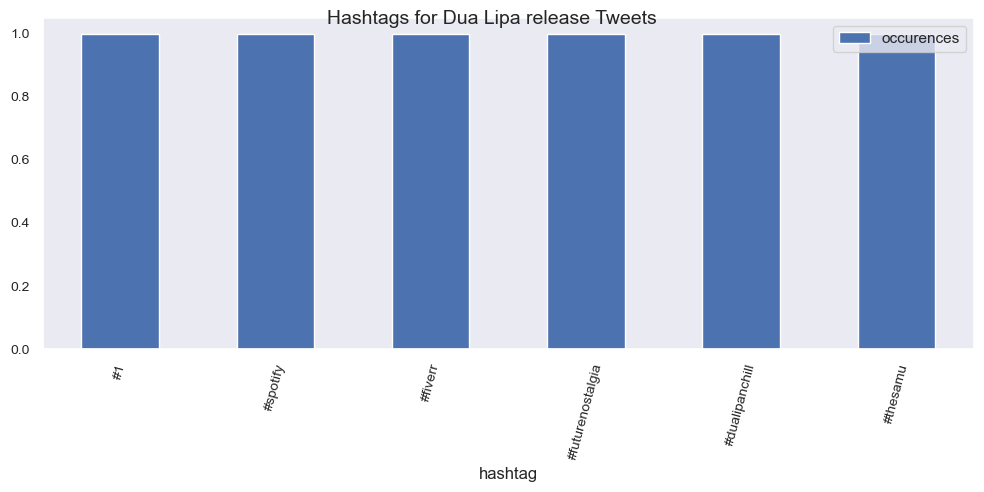

In [250]:
plot_hashtags(dualipa_release_hashtags, "Dua Lipa release")

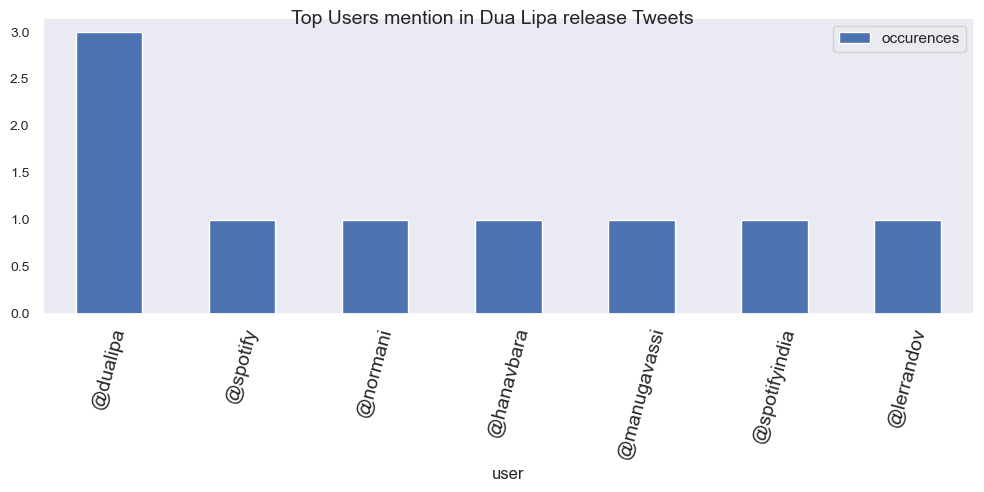

In [251]:
plot_users(dualipa_release_users, "Dua Lipa release")

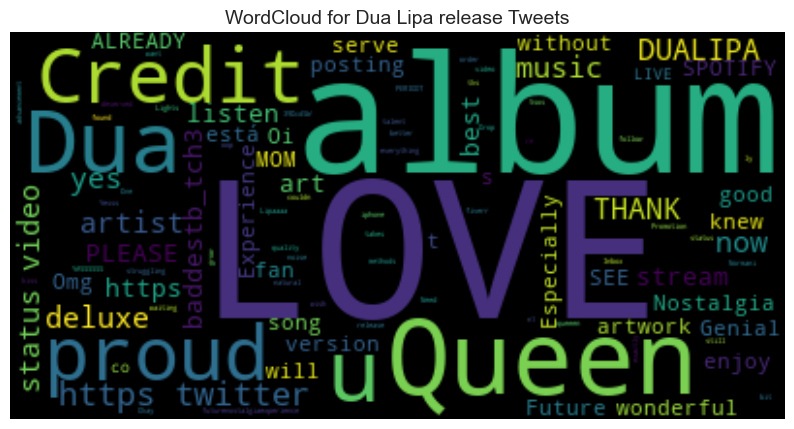

In [252]:
plot_wordcloud(dualipa_release, "Dua Lipa release")

<font size="+1" color='turquoise'><b> Halsey</b></font>        

### We are going to look into the Halsy's post-release tweet, the hashtags, users mention and frequent words using Wordcloud

In [253]:
halsey_release_hashtags = extract_hashtags(halsey_release, 'Tweet_Content')
halsey_release_users = extract_users(halsey_release, 'Tweet_Content')

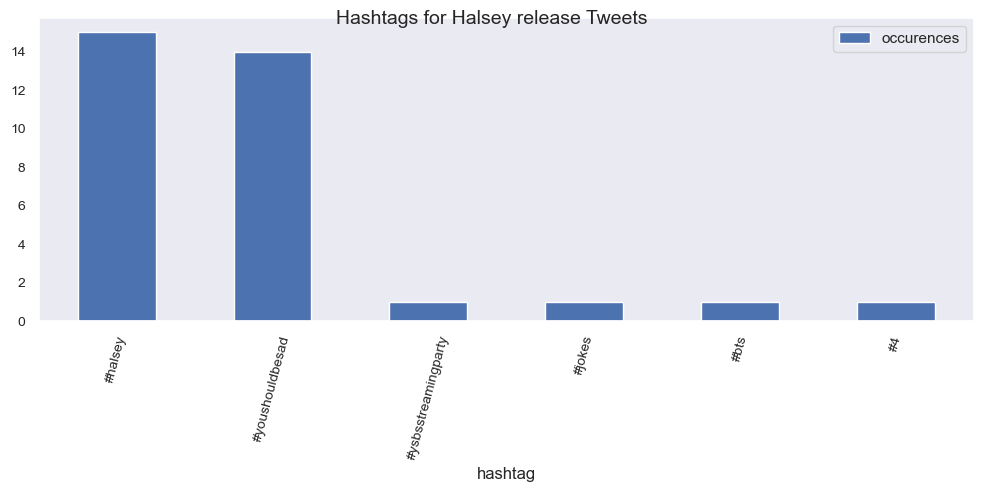

In [254]:
plot_hashtags(halsey_release_hashtags, 'Halsey release')

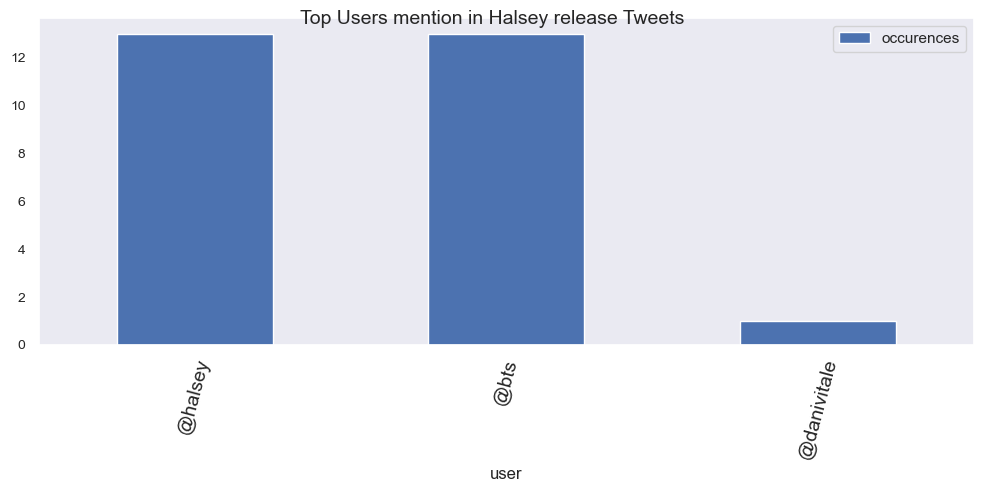

In [255]:
plot_users(halsey_release_users, 'Halsey release')

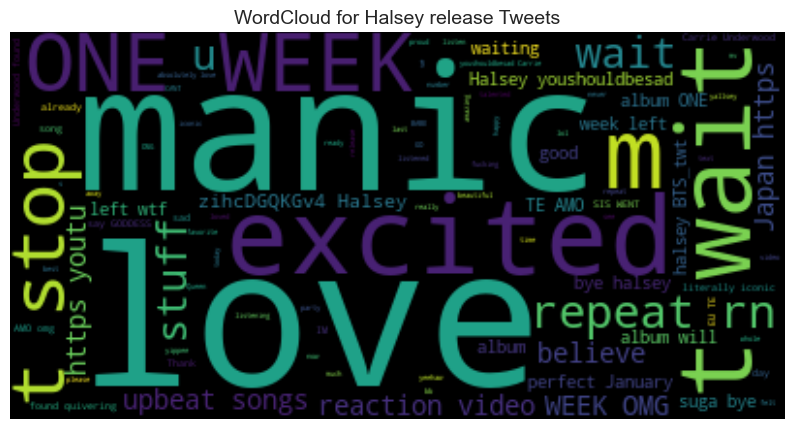

In [256]:
plot_wordcloud(halsey_release, 'Halsey release')

<font size="+1" color='turquoise'><b> The Killers</b></font>        

### We are going to look into the The Killers post-release tweet, the hashtags, users mention and frequent words using Wordcloud

In [257]:
killers_release_hashtags = extract_hashtags(killers_release, 'Tweet_Content')
killers_release_users = extract_users(killers_release, 'Tweet_Content')

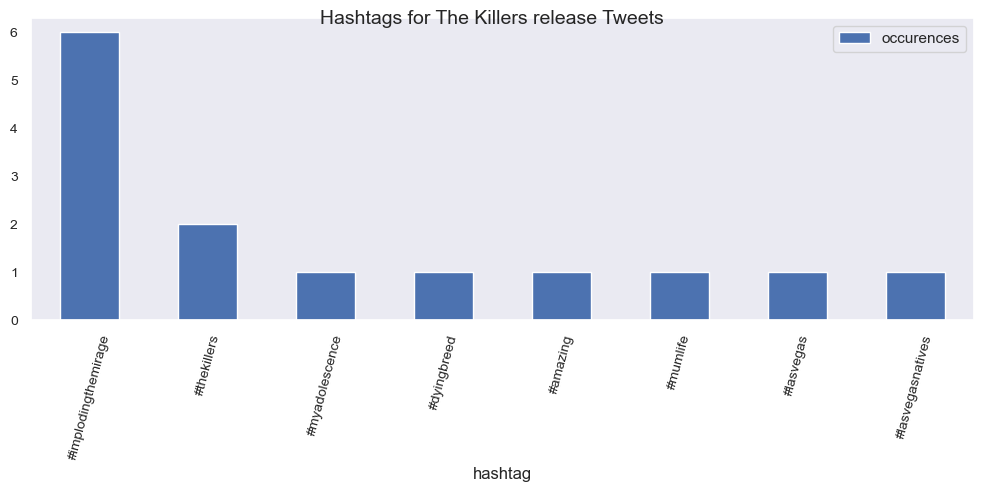

In [258]:
plot_hashtags(killers_release_hashtags, 'The Killers release')

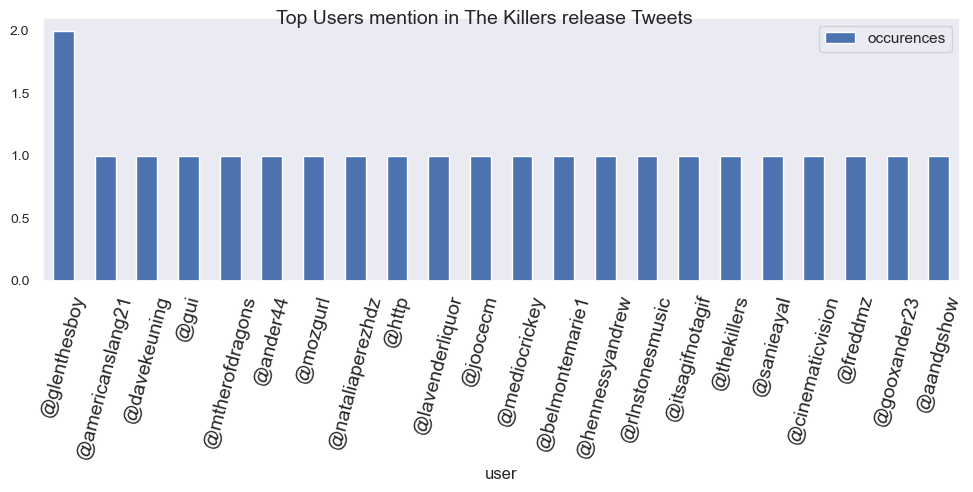

In [259]:
plot_users(killers_release_users, 'The Killers release')

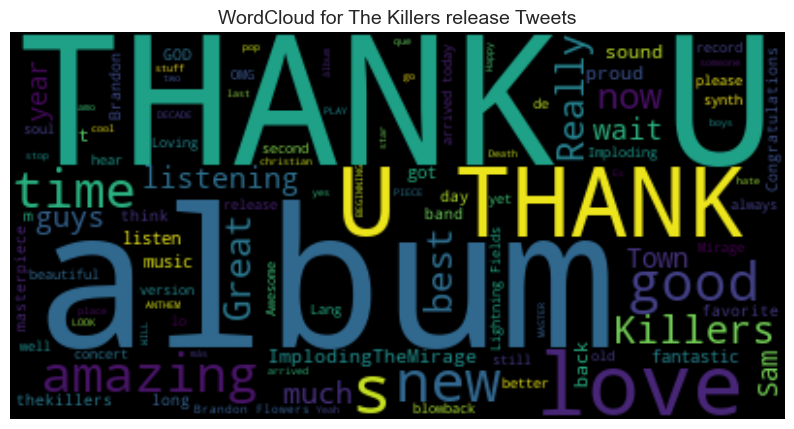

In [260]:
plot_wordcloud(killers_release, 'The Killers release')

<font size="+1" color='turquoise'><b> The Weeknd</b></font>        

### We are going to look into the The Weeknd's post-release tweet, the hashtags, users mention and frequent words using Wordcloud

In [261]:
weeknd_release_hashtags = extract_hashtags(weeknd_release, 'Tweet_Content')
weeknd_release_users = extract_users(weeknd_release, 'Tweet_Content')

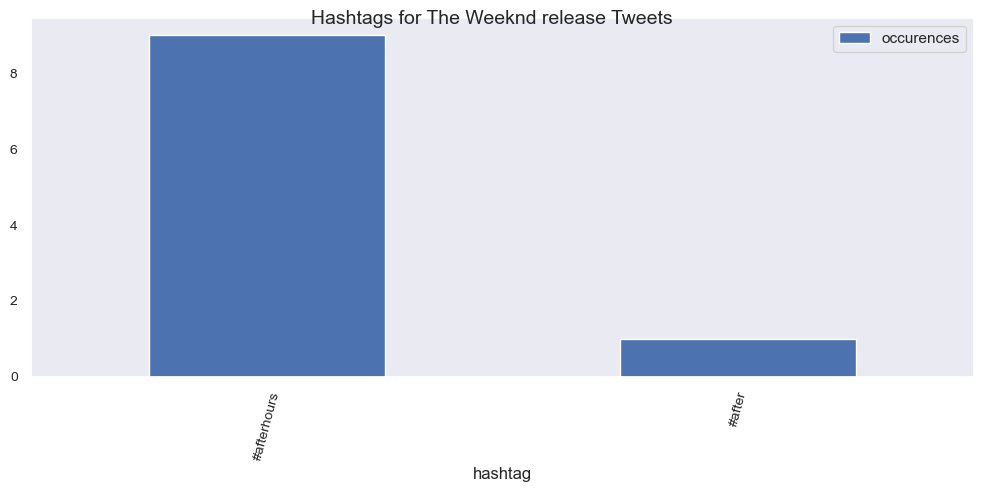

In [262]:
plot_hashtags(weeknd_release_hashtags, 'The Weeknd release')

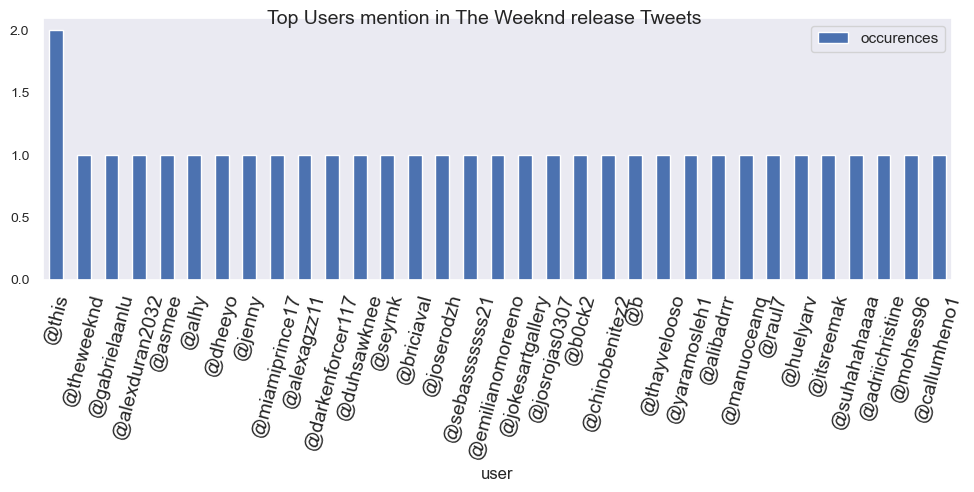

In [263]:
plot_users(weeknd_release_users, 'The Weeknd release')

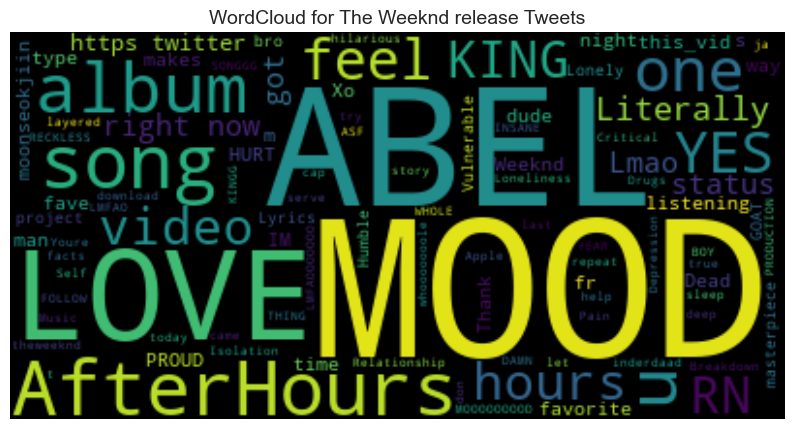

In [264]:
plot_wordcloud(weeknd_release, 'The Weeknd release')

<font size="+1" color='turquoise'><b> All Post-release tweets</b></font>        

### We are going to look into the all artists post-release tweets combined, the hashtags, users mention and frequent words using Wordcloud

In [265]:
release_df_hashtags = extract_hashtags(release_df, 'Tweet_Content')
release_df_users = extract_users(release_df, 'Tweet_Content')

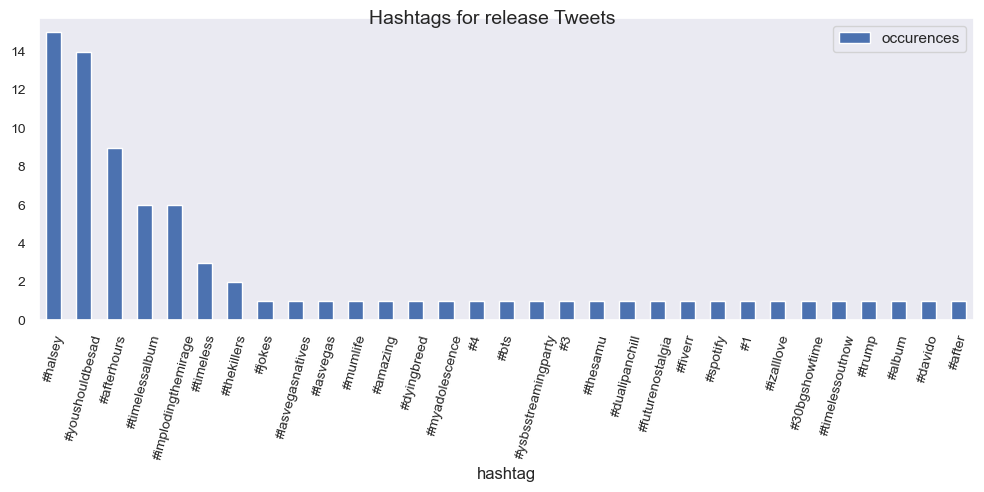

In [266]:
plot_hashtags(release_df_hashtags, 'release')

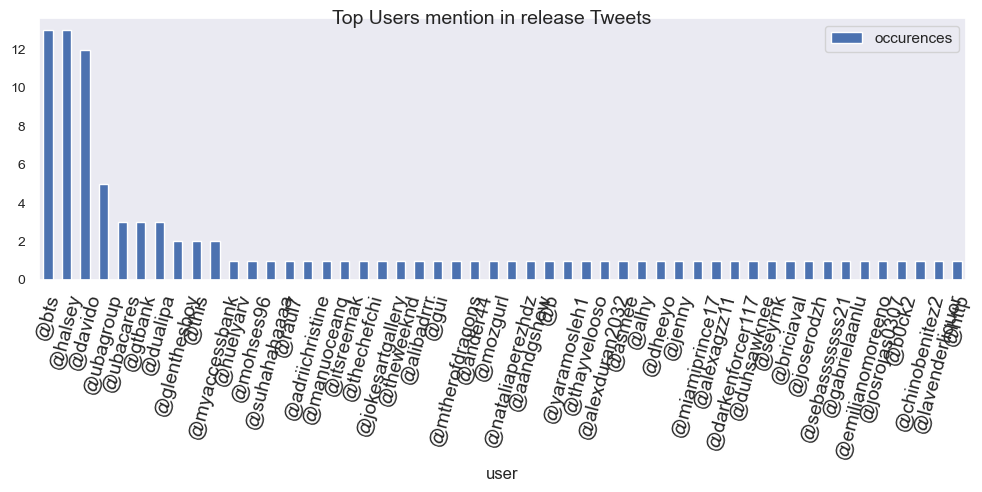

In [267]:
plot_users(release_df_users, 'release')

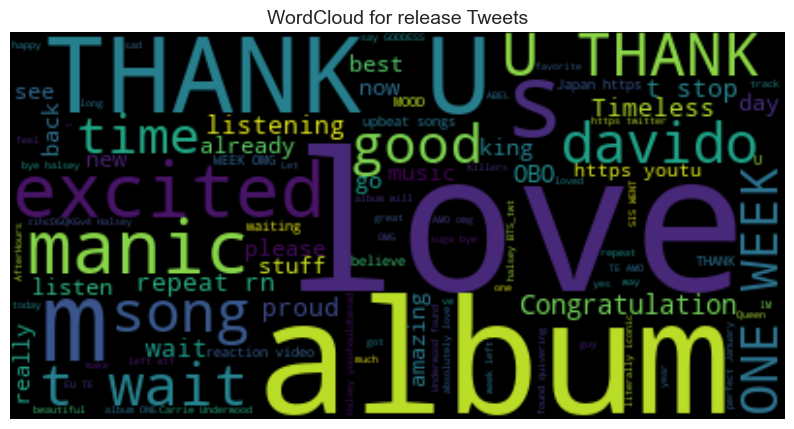

In [268]:
plot_wordcloud(release_df, 'release')

<a id='prep'></a>
<font size="+2" color='purple'><b> Artists Analysis: Pre-release & Post-release combined</b></font>  
[back to top](#table-of-contents)  

<font size="+2" color='turquoise'><b> Davido</b></font>        

### We are going to look into the Davido's pre & post-release tweets combined, the hashtags, users mention and frequent words using Wordcloud

In [269]:
davido_df_hashtags = extract_hashtags(davido_df, 'Tweet_Content')

In [270]:
davido_df_users = extract_users(davido_df, 'Tweet_Content')

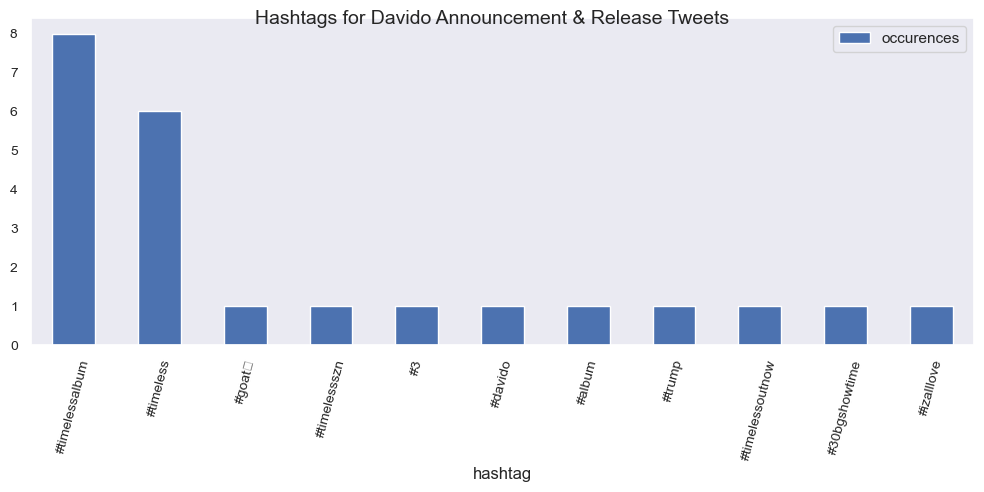

In [271]:
plot_hashtags(davido_df_hashtags, "Davido Announcement & Release")

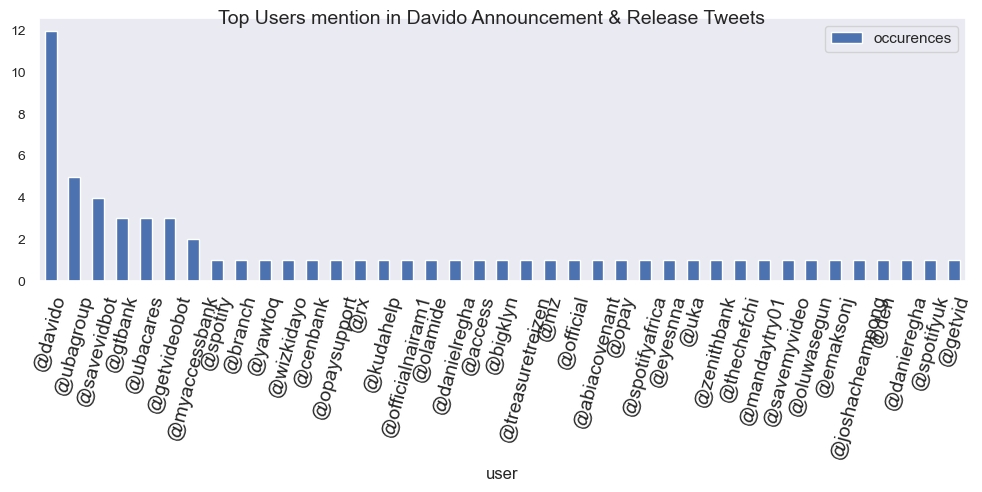

In [272]:
plot_users(davido_df_users, "Davido Announcement & Release")

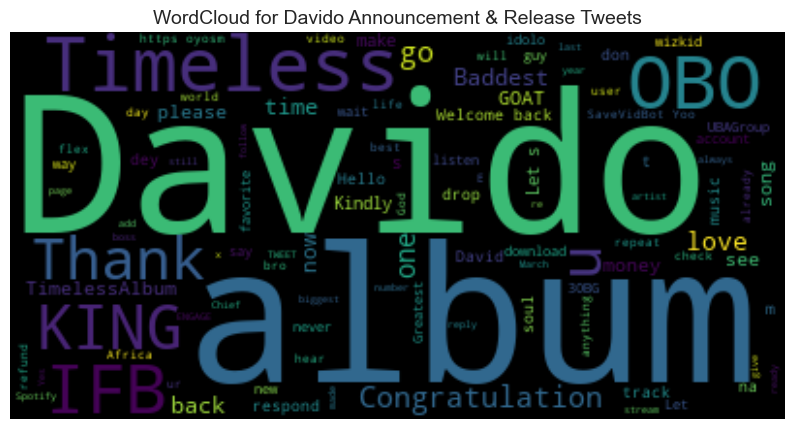

In [273]:
plot_wordcloud(davido_df, "Davido Announcement & Release")

<font size="+2" color='turquoise'><b> Dua Lipa</b></font>        

### We are going to look into the Dualipa's pre & post-release tweets combined, the hashtags, users mention and frequent words using Wordcloud

In [274]:
dualipa_df_hashtags = extract_hashtags(dualipa_df, 'Tweet_Content')
dualipa_df_users = extract_users(dualipa_df, 'Tweet_Content')

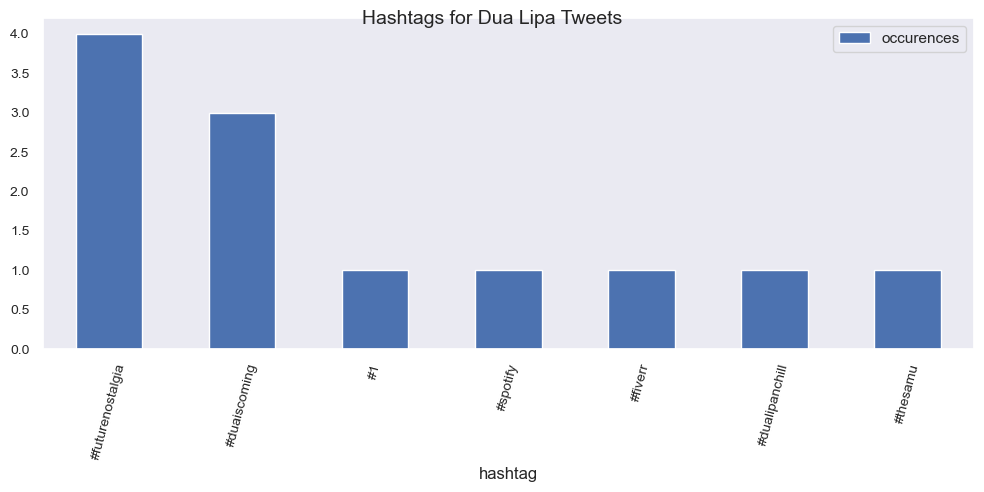

In [275]:
plot_hashtags(dualipa_df_hashtags, 'Dua Lipa')

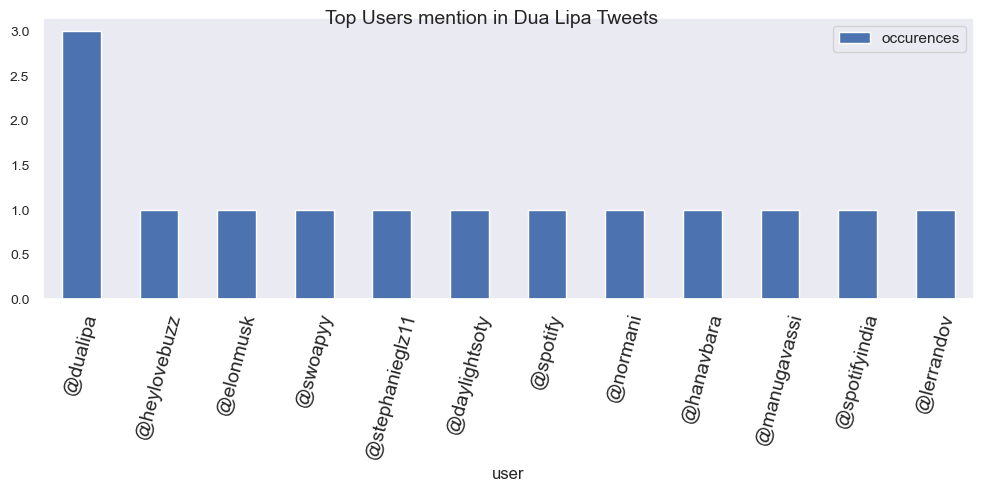

In [276]:
plot_users(dualipa_df_users, 'Dua Lipa')

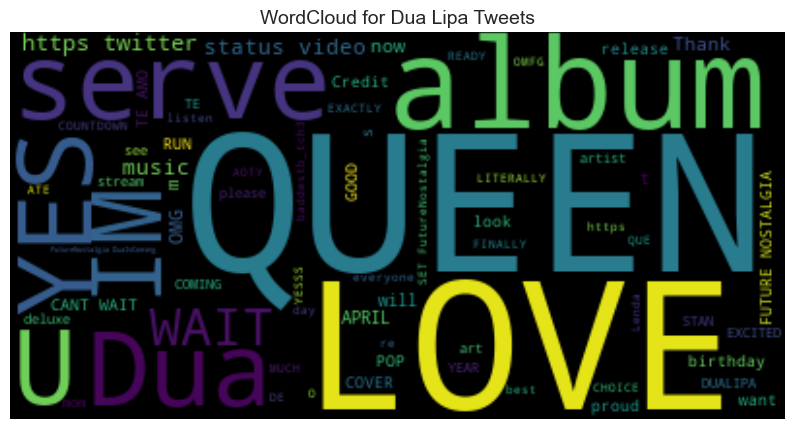

In [277]:
plot_wordcloud(dualipa_df, 'Dua Lipa')

<font size="+2" color='turquoise'><b> Halsey</b></font>         

### We are going to look into the Halsey's pre & post-release tweets combined, the hashtags, users mention and frequent words using Wordcloud 

In [278]:
halsey_df_hashtags = extract_hashtags(halsey_df, 'Tweet_Content')
halsey_df_users = extract_users(halsey_df, 'Tweet_Content')

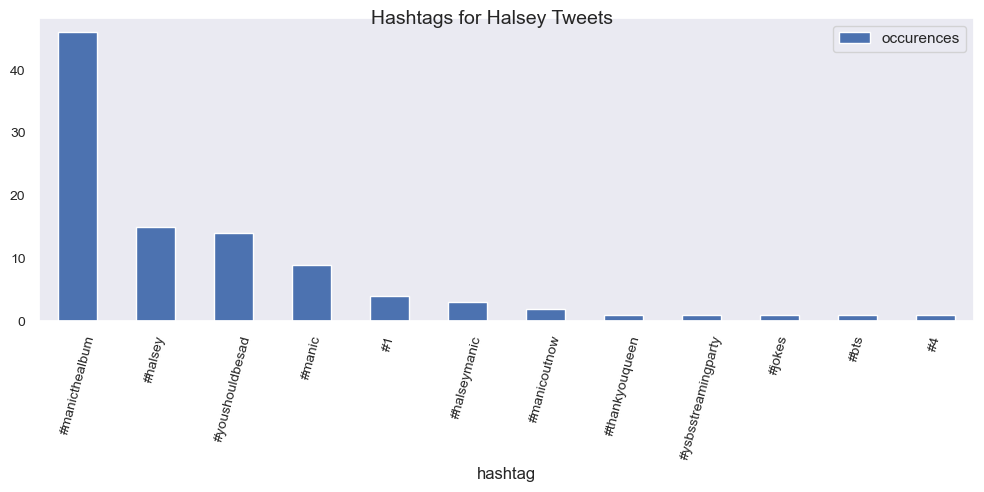

In [279]:
plot_hashtags(halsey_df_hashtags, "Halsey")

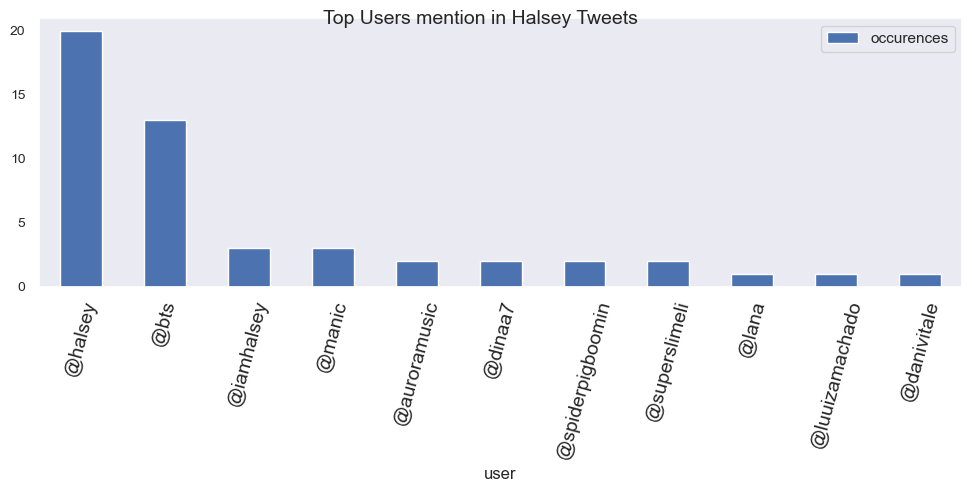

In [280]:
plot_users(halsey_df_users, 'Halsey')

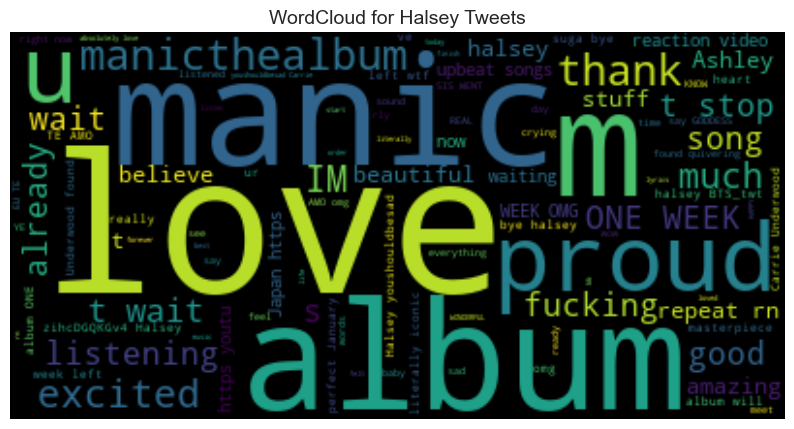

In [281]:
plot_wordcloud(halsey_df, 'Halsey')

<font size="+2" color='turquoise'><b> The Killers</b></font>          

### We are going to look into The Killers pre & post-release tweets combined, the hashtags, users mention and frequent words using Wordcloud

In [282]:
killers_df_hashtags = extract_hashtags(killers_df, 'Tweet_Content')
killers_df_users = extract_users(killers_df, 'Tweet_Content')

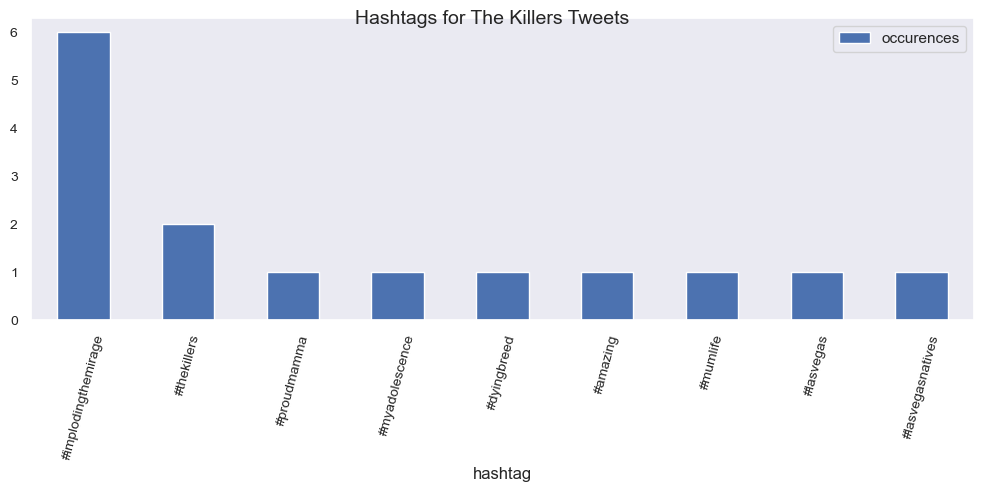

In [283]:
plot_hashtags(killers_df_hashtags, 'The Killers')

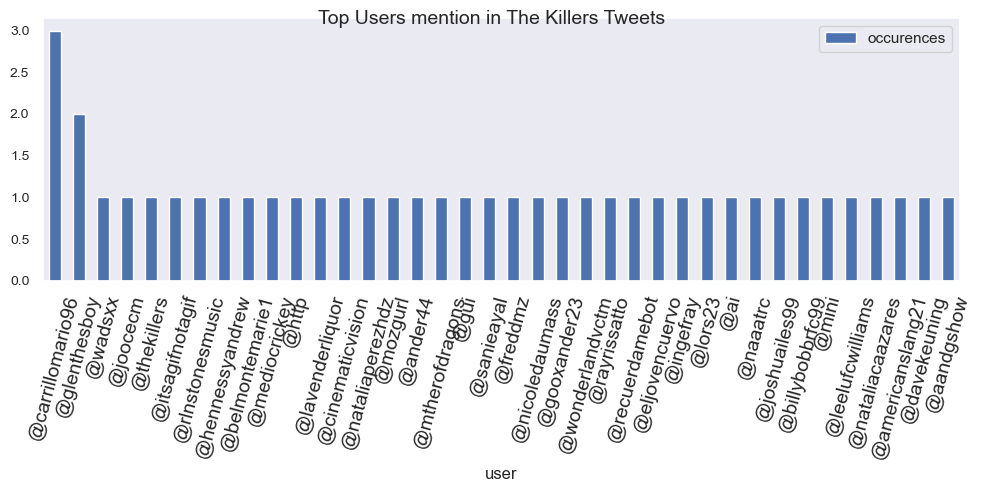

In [284]:
plot_users(killers_df_users, 'The Killers')

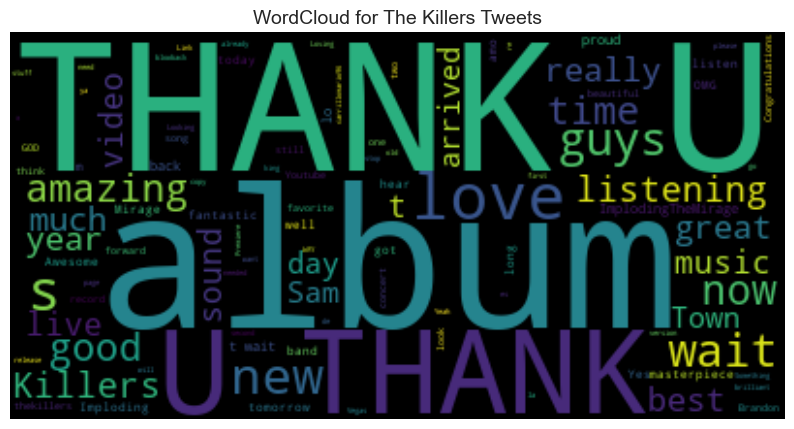

In [285]:
plot_wordcloud(killers_df, 'The Killers')

<font size="+2" color='turquoise'><b> The Weeknd</b></font>         

### We are going to look into The Weeknd's pre & post-release tweets combined, the hashtags, users mention and frequent words using Wordcloud 

In [286]:
weeknd_df = combine_dataframes([weeknd_announcement, weeknd_release])

In [287]:
weeknd_df_hashtags = extract_hashtags(weeknd_df, 'Tweet_Content')
weeknd_df_users = extract_users(weeknd_df, 'Tweet_Content')

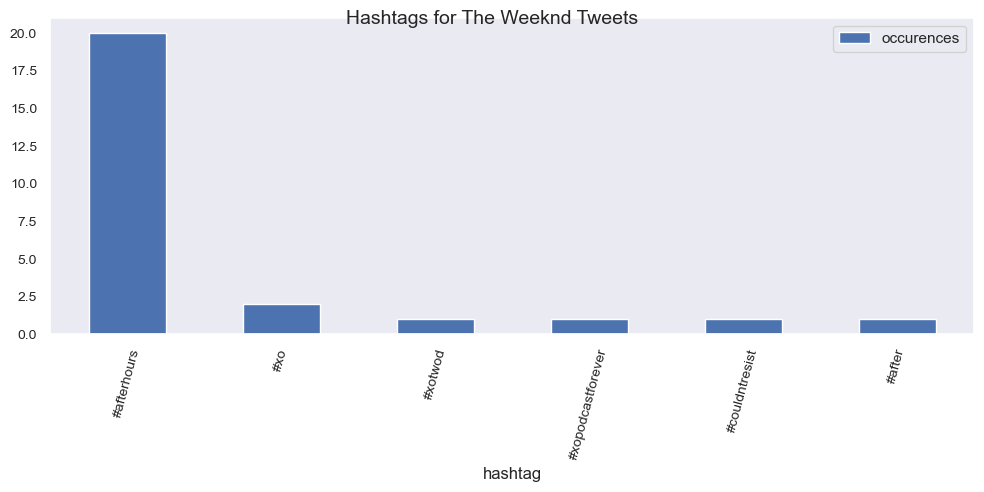

In [288]:
plot_hashtags(weeknd_df_hashtags, 'The Weeknd')

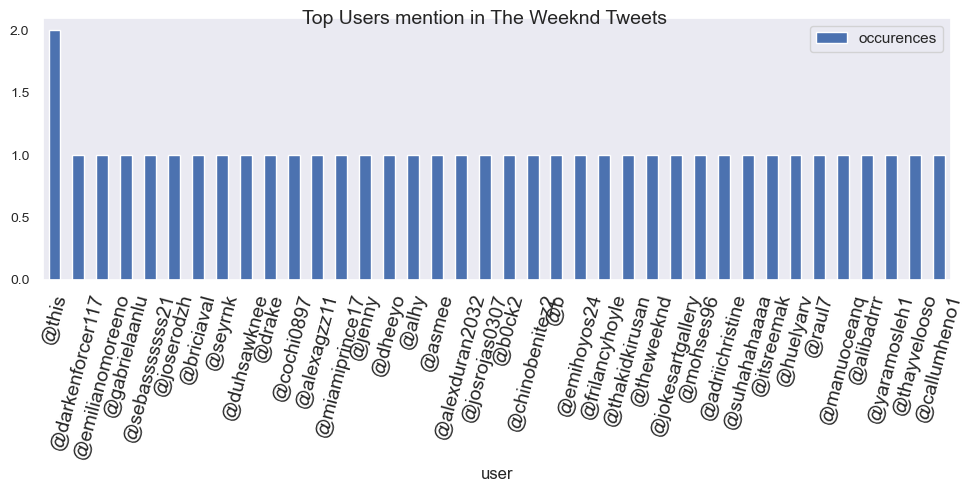

In [289]:
plot_users(weeknd_df_users, 'The Weeknd')

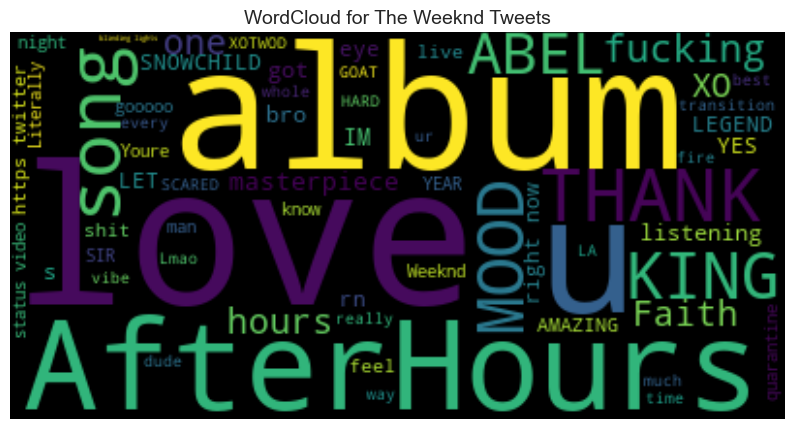

In [290]:
plot_wordcloud(weeknd_df, 'The Weeknd')

<font size="+2" color='turquoise'><b> All Tweets Analysis</b></font>          

### We are going to look into all the tweets we have scraped combined, the hashtags, users mention and frequent words using Wordcloud 

In [291]:
all_df = combine_dataframes([davido_announcement, dualipa_announcement,
                             halsey_announcement, killers_announcement,
                             weeknd_announcement, davido_release,
                             dualipa_release, halsey_release,
                             killers_release, weeknd_release])

In [292]:
all_df_hashtags = extract_hashtags(announcement_df, 'Tweet_Content')
all_df_users = extract_users(announcement_df, 'Tweet_Content')

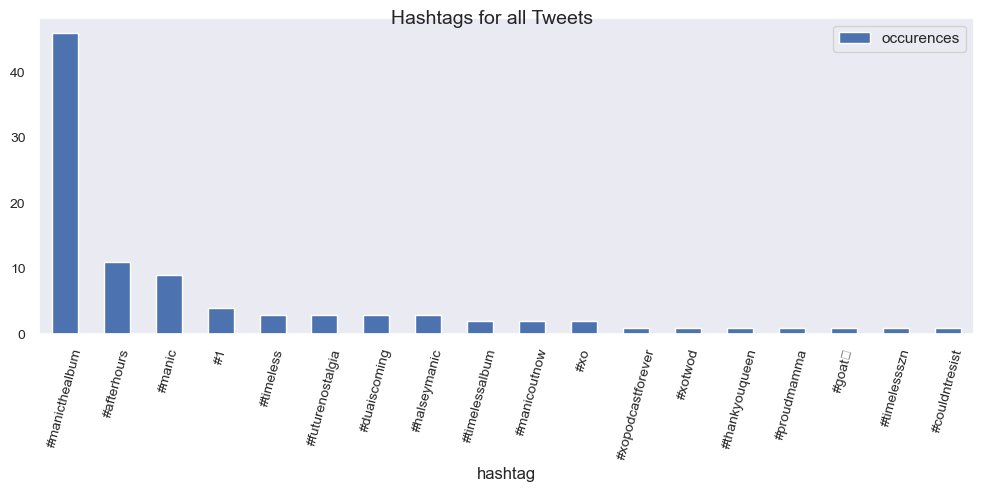

In [293]:
plot_hashtags(all_df_hashtags, 'all')

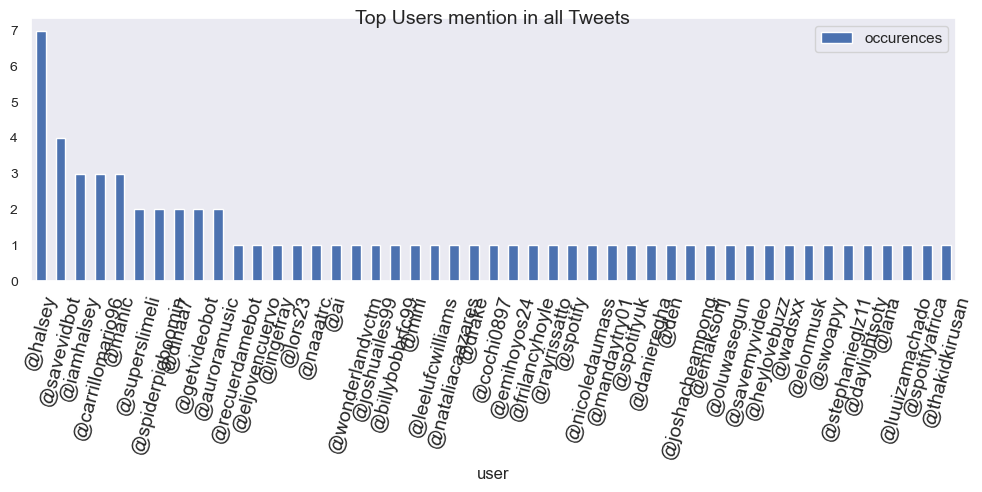

In [294]:
plot_users(all_df_users, 'all')

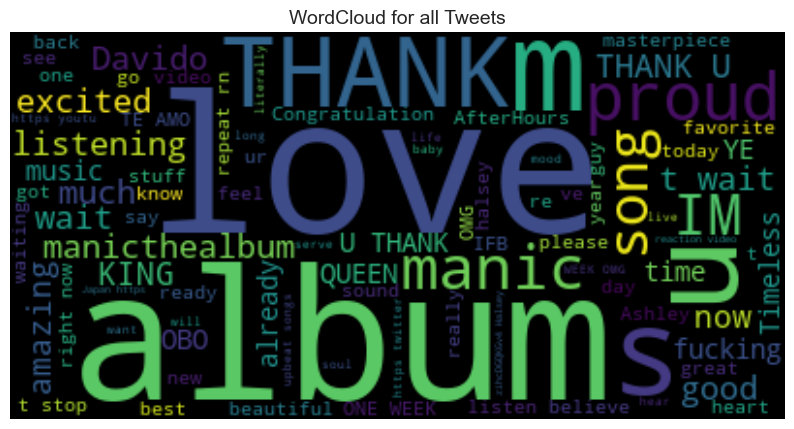

In [295]:
plot_wordcloud(all_df, 'all')

<a id='modeling'></a>
<font size="+4" color='#053c96'><b> Sentiment Analysis using Vader</b></font>  
[back to top](#table-of-contents)           

### In this section we are going to look into the sentiments of users in our datasets in the following order:

* pre & post-release tweets for each artist
* all pre-release tweets
* all post-release tweets
* all tweets combined

In [296]:
all_df['Tweet_Number_of_Likes'] = all_df['Tweet_Number_of_Likes'].str.replace(',', '').str.replace('K', '').str.replace('.', '').fillna(0).astype(int)
all_df['Tweet_Number_of_Retweets'] = all_df['Tweet_Number_of_Retweets'].str.replace(',', '').fillna(0).astype(int)
all_df['Tweet_Number_of_Reviews'] = all_df['Tweet_Number_of_Reviews'].fillna(0).astype(int)

<a id='prep'></a>
<font size="+3" color='#780404'><b> Artists</b></font>  
[back to top](#table-of-contents)  

In [297]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

<font size="+2" color='purple'><b> Davido</b></font>  

In [298]:
davido_announcement['Tweet_Content'] = davido_announcement.Tweet_Content.apply(text_preproc)
davido_announcement['Tweet_Content'] = clean_column(davido_announcement['Tweet_Content'])
davido_announcement['Tweet_Content'] = davido_announcement.Tweet_Content.apply(emoji_converter)
davido_announcement['Sentiment'] = davido_announcement['Tweet_Content'].apply(get_sentiment_label)

davido_release['Tweet_Content'] = davido_release.Tweet_Content.apply(text_preproc)
davido_release['Tweet_Content'] = clean_column(davido_release['Tweet_Content'])
davido_release['Tweet_Content'] = davido_release.Tweet_Content.apply(emoji_converter)
davido_release['Sentiment'] = davido_release['Tweet_Content'].apply(get_sentiment_label)

davido_df['Tweet_Content'] = davido_df.Tweet_Content.apply(text_preproc)
davido_df['Tweet_Content'] = clean_column(davido_df['Tweet_Content'])
davido_df['Tweet_Content'] = davido_df.Tweet_Content.apply(emoji_converter)
davido_df['Sentiment'] = davido_df['Tweet_Content'].apply(get_sentiment_label)

#### Users Sentiments in Davido's pre-release tweet data

In [299]:
davido_announcement['Sentiment'].value_counts()

Neutral     114
Positive     33
Negative      5
Name: Sentiment, dtype: int64

#### Users Sentiments in Davido's post-release tweet data

In [300]:
davido_release['Sentiment'].value_counts()

Positive    80
Neutral     76
Negative    17
Name: Sentiment, dtype: int64

#### Users Sentiments in Davido's pre & post-release tweet data with barchart

In [301]:
davido_df['Sentiment'].value_counts()

Neutral     190
Positive    113
Negative     22
Name: Sentiment, dtype: int64

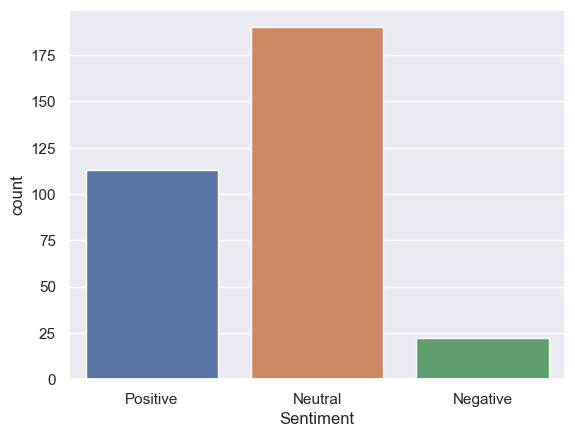

In [302]:
plot_sentiment_distribution(davido_df, 'Sentiment')

<font size="+2" color='purple'><b> Dua Lipa</b></font>  

In [303]:
dualipa_announcement['Tweet_Content'] = dualipa_announcement.Tweet_Content.apply(text_preproc)
dualipa_announcement['Tweet_Content'] = clean_column(dualipa_announcement['Tweet_Content'])
dualipa_announcement['Tweet_Content'] = dualipa_announcement.Tweet_Content.apply(emoji_converter)
dualipa_announcement['Sentiment'] = dualipa_announcement['Tweet_Content'].apply(get_sentiment_label)

dualipa_release['Tweet_Content'] = dualipa_release.Tweet_Content.apply(text_preproc)
dualipa_release['Tweet_Content'] = clean_column(dualipa_release['Tweet_Content'])
dualipa_release['Tweet_Content'] = dualipa_release.Tweet_Content.apply(emoji_converter)
dualipa_release['Sentiment'] = dualipa_release['Tweet_Content'].apply(get_sentiment_label)

dualipa_df['Tweet_Content'] = dualipa_df.Tweet_Content.apply(text_preproc)
dualipa_df['Tweet_Content'] = clean_column(dualipa_df['Tweet_Content'])
dualipa_df['Tweet_Content'] = dualipa_df.Tweet_Content.apply(emoji_converter)
dualipa_df['Sentiment'] = dualipa_df['Tweet_Content'].apply(get_sentiment_label)

#### Users Sentiments in Dualipa's pre-release tweet data

In [304]:
dualipa_announcement['Sentiment'].value_counts()

Neutral     131
Positive     54
Negative     16
Name: Sentiment, dtype: int64

#### Users Sentiments in Dualipa's post-release tweet data

In [305]:
dualipa_release['Sentiment'].value_counts()

Positive    56
Neutral     39
Negative     4
Name: Sentiment, dtype: int64

#### Users Sentiments in Dualipa's pre & post-release tweet data with a barchart

In [306]:
dualipa_df['Sentiment'].value_counts()

Neutral     170
Positive    110
Negative     20
Name: Sentiment, dtype: int64

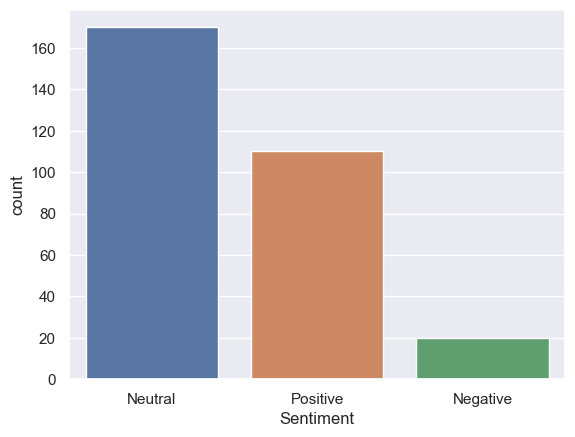

In [307]:
plot_sentiment_distribution(dualipa_df, 'Sentiment')

<font size="+2" color='purple'><b> Halsey</b></font>  

In [308]:
halsey_announcement['Tweet_Content'] = halsey_announcement.Tweet_Content.apply(text_preproc)
halsey_announcement['Tweet_Content'] = clean_column(halsey_announcement['Tweet_Content'])
halsey_announcement['Tweet_Content'] = halsey_announcement.Tweet_Content.apply(emoji_converter)
halsey_announcement['Sentiment'] = halsey_announcement['Tweet_Content'].apply(get_sentiment_label)

halsey_release['Tweet_Content'] = halsey_release.Tweet_Content.apply(text_preproc)
halsey_release['Tweet_Content'] = clean_column(halsey_release['Tweet_Content'])
halsey_release['Tweet_Content'] = halsey_release.Tweet_Content.apply(emoji_converter)
halsey_release['Sentiment'] = halsey_release['Tweet_Content'].apply(get_sentiment_label)

halsey_df['Tweet_Content'] = halsey_df.Tweet_Content.apply(text_preproc)
halsey_df['Tweet_Content'] = clean_column(halsey_df['Tweet_Content'])
halsey_df['Tweet_Content'] = halsey_df.Tweet_Content.apply(emoji_converter)
halsey_df['Sentiment'] = halsey_df['Tweet_Content'].apply(get_sentiment_label)

#### Users Sentiments in Halsey's pre-release tweet data

In [309]:
halsey_announcement['Sentiment'].value_counts()

Positive    167
Neutral      74
Negative     27
Name: Sentiment, dtype: int64

#### Users Sentiments in Halsey's post-release tweet data

In [310]:
halsey_release['Sentiment'].value_counts()

Neutral     172
Positive    167
Negative     25
Name: Sentiment, dtype: int64

#### Users Sentiments in Halsey's pre & post-release tweet data with a barchart

In [311]:
halsey_df['Sentiment'].value_counts()

Positive    334
Neutral     246
Negative     52
Name: Sentiment, dtype: int64

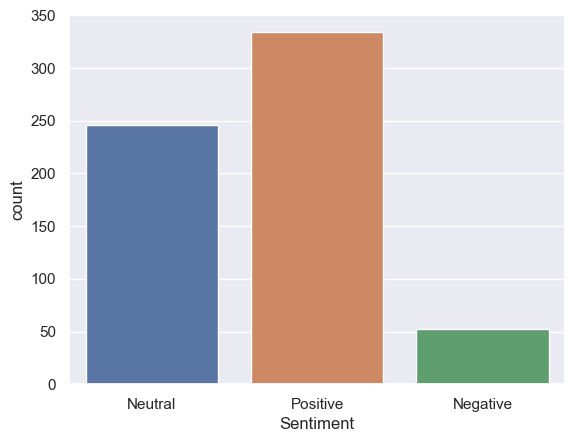

In [312]:
plot_sentiment_distribution(halsey_df, 'Sentiment')

<font size="+2" color='purple'><b> The Killers</b></font>  

In [313]:
killers_announcement['Tweet_Content'] = killers_announcement.Tweet_Content.apply(text_preproc)
killers_announcement['Tweet_Content'] = clean_column(killers_announcement['Tweet_Content'])
killers_announcement['Tweet_Content'] = killers_announcement.Tweet_Content.apply(emoji_converter)
killers_announcement['Sentiment'] = killers_announcement['Tweet_Content'].apply(get_sentiment_label)

killers_release['Tweet_Content'] = killers_release.Tweet_Content.apply(text_preproc)
killers_release['Tweet_Content'] = clean_column(killers_release['Tweet_Content'])
killers_release['Tweet_Content'] = killers_release.Tweet_Content.apply(emoji_converter)
killers_release['Sentiment'] = killers_release['Tweet_Content'].apply(get_sentiment_label)

killers_df['Tweet_Content'] = killers_df.Tweet_Content.apply(text_preproc)
killers_df['Tweet_Content'] = clean_column(killers_df['Tweet_Content'])
killers_df['Tweet_Content'] = killers_df.Tweet_Content.apply(emoji_converter)
killers_df['Sentiment'] = killers_df['Tweet_Content'].apply(get_sentiment_label)

#### Users Sentiments in The Killers pre-release tweet data

In [314]:
killers_announcement['Sentiment'].value_counts()

Neutral     45
Positive    36
Negative     5
Name: Sentiment, dtype: int64

#### Users Sentiments in The Killers post-release tweet data

In [315]:
killers_release['Sentiment'].value_counts()

Positive    89
Neutral     59
Negative     9
Name: Sentiment, dtype: int64

#### Users Sentiments in The Killers pre & post-release tweet data with a barchart

In [316]:
killers_df['Sentiment'].value_counts()

Positive    125
Neutral     104
Negative     14
Name: Sentiment, dtype: int64

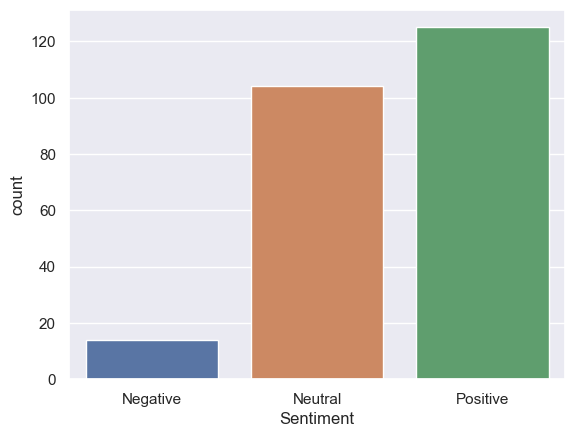

In [317]:
plot_sentiment_distribution(killers_df, 'Sentiment')

<font size="+2" color='purple'><b> The Weeknd</b></font>  

In [318]:
weeknd_announcement['Tweet_Content'] = weeknd_announcement.Tweet_Content.apply(text_preproc)
weeknd_announcement['Tweet_Content'] = clean_column(weeknd_announcement['Tweet_Content'])
weeknd_announcement['Tweet_Content'] = weeknd_announcement.Tweet_Content.apply(emoji_converter)
weeknd_announcement['Sentiment'] = weeknd_announcement['Tweet_Content'].apply(get_sentiment_label)

weeknd_release['Tweet_Content'] = weeknd_release.Tweet_Content.apply(text_preproc)
weeknd_release['Tweet_Content'] = clean_column(weeknd_release['Tweet_Content'])
weeknd_release['Tweet_Content'] = weeknd_release.Tweet_Content.apply(emoji_converter)
weeknd_release['Sentiment'] = weeknd_release['Tweet_Content'].apply(get_sentiment_label)

weeknd_df['Tweet_Content'] = weeknd_df.Tweet_Content.apply(text_preproc)
weeknd_df['Tweet_Content'] = clean_column(weeknd_df['Tweet_Content'])
weeknd_df['Tweet_Content'] = weeknd_df.Tweet_Content.apply(emoji_converter)
weeknd_df['Sentiment'] = weeknd_df['Tweet_Content'].apply(get_sentiment_label)

#### Users Sentiments in The Weeknd's pre-release tweet data

In [319]:
weeknd_announcement['Sentiment'].value_counts()

Neutral     73
Positive    70
Negative    21
Name: Sentiment, dtype: int64

#### Users Sentiments in The Weeknd's post-release tweet data

In [320]:
weeknd_release['Sentiment'].value_counts()

Neutral     94
Positive    44
Negative     8
Name: Sentiment, dtype: int64

#### Users Sentiments in The Weeknd's pre & post-release tweet data with a barchart

In [321]:
weeknd_df['Sentiment'].value_counts()

Neutral     167
Positive    114
Negative     29
Name: Sentiment, dtype: int64

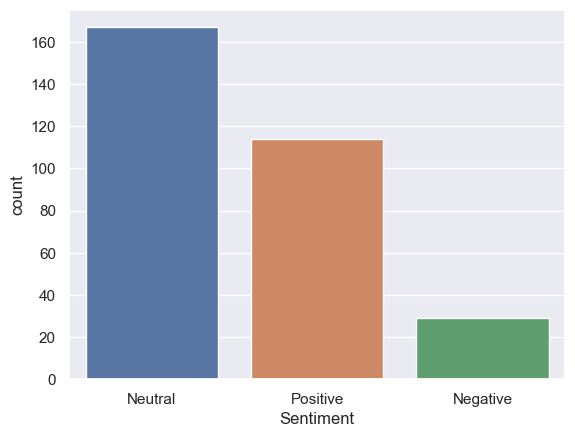

In [322]:
plot_sentiment_distribution(weeknd_df, 'Sentiment')

<a id='pre'></a>
<font size="+3" color='#780404'><b> Pre-release</b></font>  
[back to top](#table-of-contents)  

In [323]:
announcement_df['Tweet_Content'] = announcement_df.Tweet_Content.apply(text_preproc)
announcement_df['Tweet_Content'] = clean_column(announcement_df['Tweet_Content'])
announcement_df['Tweet_Content'] = announcement_df.Tweet_Content.apply(emoji_converter)
announcement_df['Sentiment'] = announcement_df['Tweet_Content'].apply(get_sentiment_label)

#### Users Sentiments in all artists pre-release tweet data combined

In [324]:
announcement_df['Sentiment'].value_counts()

Neutral     437
Positive    360
Negative     74
Name: Sentiment, dtype: int64

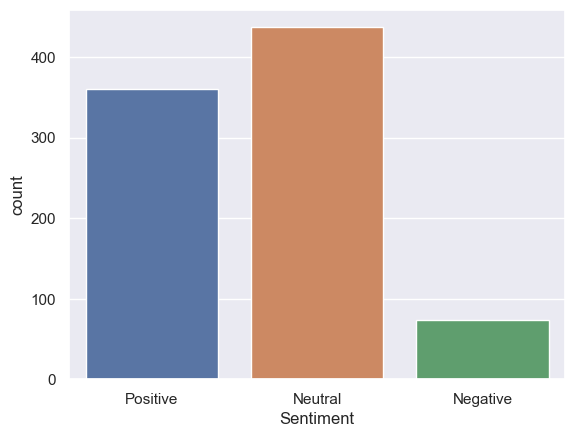

In [325]:
plot_sentiment_distribution(announcement_df, 'Sentiment')

<a id='post'></a>
<font size="+3" color='#780404'><b> Post-release</b></font>  
[back to top](#table-of-contents)  

In [326]:
release_df['Tweet_Content'] = release_df.Tweet_Content.apply(text_preproc)
release_df['Tweet_Content'] = clean_column(release_df['Tweet_Content'])
release_df['Tweet_Content'] = release_df.Tweet_Content.apply(emoji_converter)
release_df['Sentiment'] = release_df['Tweet_Content'].apply(get_sentiment_label)

#### Users Sentiments in all artists post-release tweet data combined

In [327]:
release_df['Sentiment'].value_counts()

Neutral     440
Positive    436
Negative     63
Name: Sentiment, dtype: int64

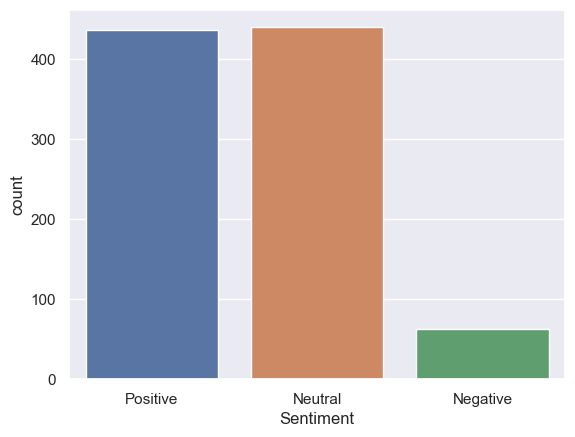

In [328]:
plot_sentiment_distribution(release_df, 'Sentiment')

<a id='all'></a>
<font size="+3" color='#780404'><b> All Tweets</b></font>  
[back to top](#table-of-contents)  

In [329]:
all_df['Tweet_Content'] = all_df.Tweet_Content.apply(text_preproc)
all_df['Tweet_Content'] = clean_column(all_df['Tweet_Content'])
all_df['Tweet_Content'] = all_df.Tweet_Content.apply(emoji_converter)
all_df['Sentiment'] = all_df['Tweet_Content'].apply(get_sentiment_label)

#### Users Sentiments in all artists tweet data combined

In [330]:
all_df['Sentiment'].value_counts()

Neutral     877
Positive    796
Negative    137
Name: Sentiment, dtype: int64

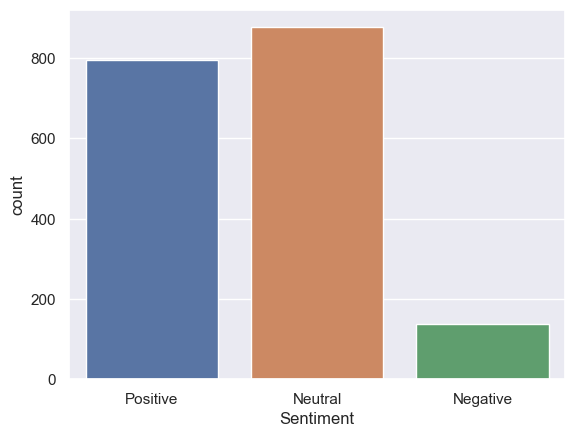

In [331]:
plot_sentiment_distribution(all_df, 'Sentiment')

#### Saving files for dashboard

In [332]:
announcement_df.to_csv('all_pre_tweets.csv')
release_df.to_csv('all_post_tweets.csv')
all_df.to_csv('all_tweets.csv')